# The Use of Generative AI in the video games industry

## Introduction
Here we will analyze the survey data # TODO: write the intro

## Initial setup
Load the needed libraries and the survey data.

In [105]:
# Load necessary libraries
library(tidyverse) # TODO: Insert descriptions of the libraries
library(syuzhet)
library(wordcloud)
library(tidytext)
library(readxl)
library(tm)

# Load the provided survey data
file_path <- "data/cleanSurveyData20240514.xlsx"
data <- read_excel(file_path)

### Show the column names + index number (survey questions)
From here on we will use the index numbers to refer to the questions.
Eg. to a

In [106]:
# Display the column names
print(colnames(data))

 [1] "ID"                                                                                                       
 [2] "Start time"                                                                                               
 [3] "Completion time"                                                                                          
 [4] "Email"                                                                                                    
 [5] "Do you consider yourself a professional or a hobbyist in game development?"                               
 [6] "Primary area of work?"                                                                                    
 [7] "Years of experience in game development?"                                                                 
 [8] "Are you in a lead role?"                                                                                  
 [9] "Team size?"                                                                               

## Count of Professionals vs. Hobbyists
Here we'll access column [5] "Do you consider yourself a professional or a hobbyist in game development?"

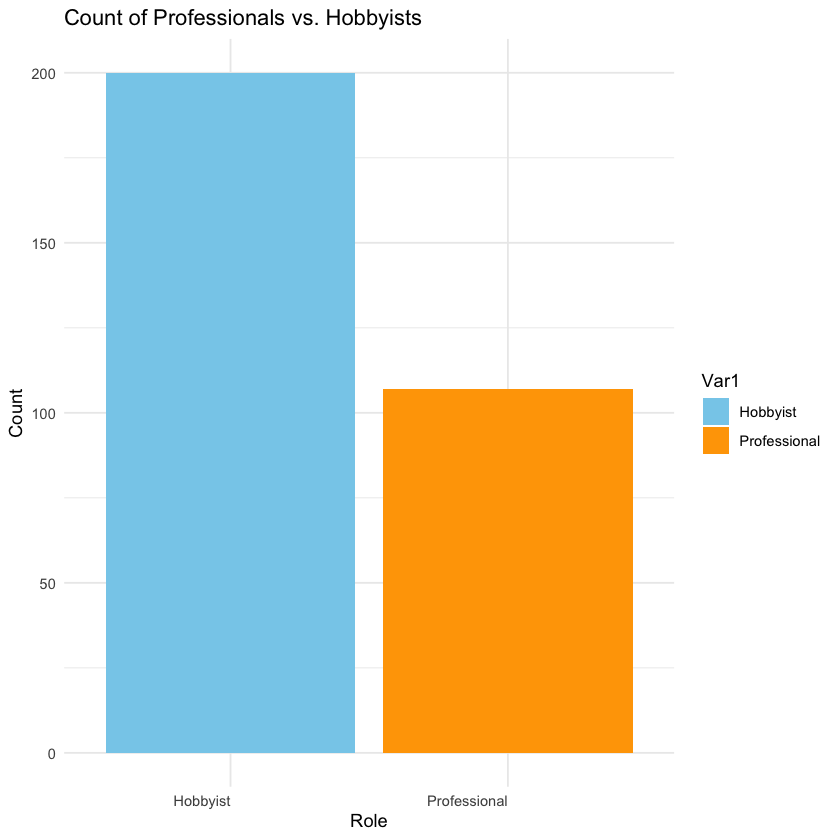

In [107]:
# Fill missing values in
# 'Do you consider yourself a professional or a hobbyist in game development?'
data[[5]][is.na(data[[5]])] <- "Unknown"

# Descriptive analysis: Count of professionals vs. hobbyists
professional_hobbyist_count <- table(data[[5]])

# Plotting the count of professionals vs. hobbyists
ggplot(
  as.data.frame(professional_hobbyist_count),
  aes(x = Var1, y = Freq, fill = Var1)
) +
  geom_bar(stat = "identity") +
  theme_minimal() +
  labs(
    title = "Count of Professionals vs. Hobbyists",
    x = "Role",
    y = "Count"
  ) +
  theme(
    axis.text.x = element_text(angle = 0, hjust = 1)
  ) +
  scale_fill_manual(values = c(
    "skyblue",
    "orange"
  )
  )


## Primary area of work

Here it's column [6] "Primary area of work?" 

In [108]:
# Show the distribution of 'Primary area of work?' in number of respondents
primary_area_count <- table(data[6])

# Print the raw count of respondents in each primary area of work
primary_area_count

Primary area of work?
                                                                                                                                                                                     Art & Assets 
                                                                                                                                                                                               35 
                                                                                                                                                                                    Audio & Music 
                                                                                                                                                                                                3 
                                                                                                                                                                                   Auto body, lol 
   

### Manual clean up of categories

In [109]:
# Generalists
for (i in c(7, 9, 11, 12)) { # Combine the categories
  primary_area_count[8] <- primary_area_count[8] + primary_area_count[i]
}

# Rename to Generalists
names(primary_area_count)[8] <- "Generalists"

# Other
for (i in c(3, 4, 6, 14)) { # Combine the categories
  primary_area_count[15] <- primary_area_count[15] + primary_area_count[i]
}

# Rename to Other
names(primary_area_count)[15] <- "Other"

# Remove the categories that were combined
primary_area_count <- primary_area_count[-c(7, 9, 11, 12, 3, 4, 6, 14)]

# Output the cleaned up categories
primary_area_count

           Art & Assets           Audio & Music     Design & Production 
                     35                       3                      13 
            Generalists          Marketing & PR Technical & Programming 
                    138                       1                     112 
                  Other 
                      5 

### Visualizing the data

Warning message in dotchart(primary_area_count, labels = paste(names(primary_area_count), :
"'x' is neither a vector nor a matrix: using as.numeric(x)"


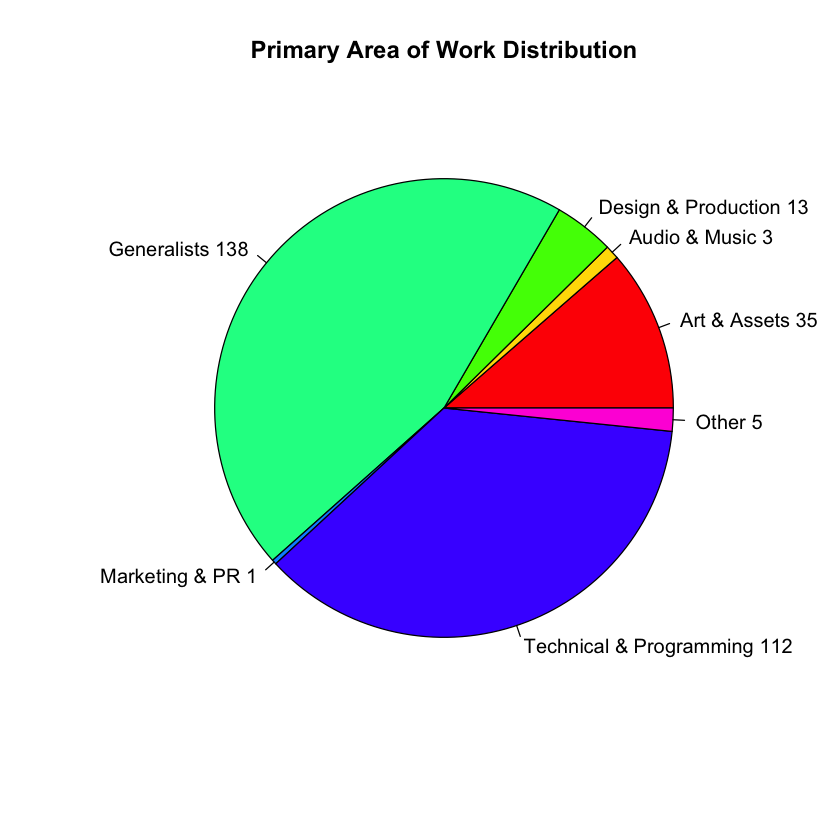

           Art & Assets           Audio & Music     Design & Production 
                     35                       3                      13 
            Generalists          Marketing & PR Technical & Programming 
                    138                       1                     112 
                  Other 
                      5 

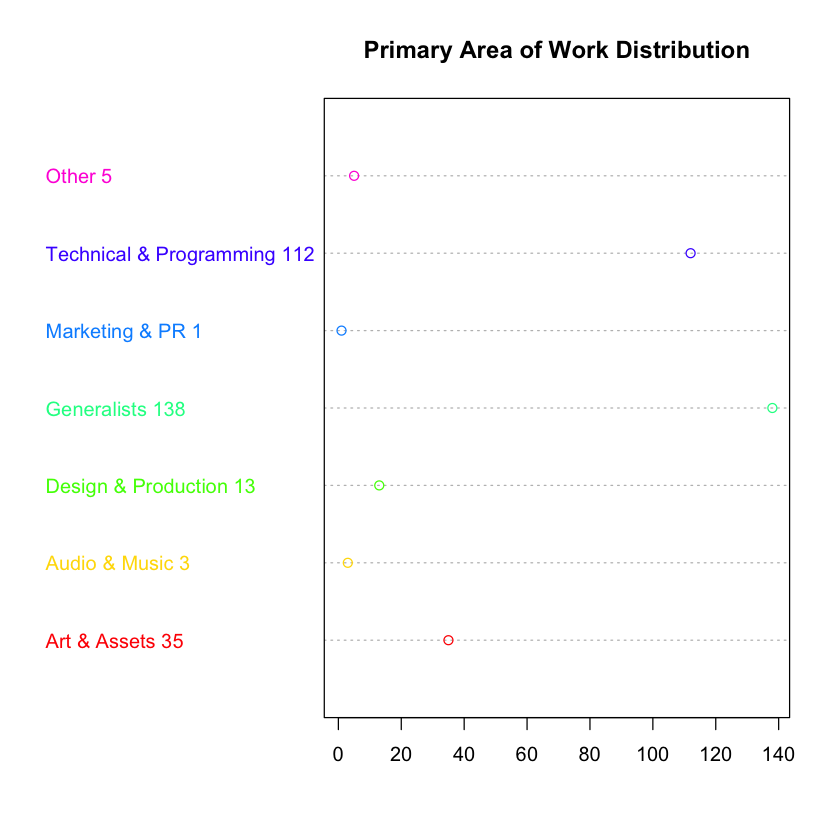

In [110]:
# Distribution of primary areas of work
pie(
  primary_area_count,
  labels = paste(names(primary_area_count), primary_area_count),
  main = "Primary Area of Work Distribution",
  col = rainbow(length(primary_area_count))
)



# And as a dotchart
dotchart(
  primary_area_count,
  labels = paste(names(primary_area_count), primary_area_count),
  main = "Primary Area of Work Distribution",
  col = rainbow(length(primary_area_count))
)

primary_area_count

## Distribution of Years of Experience
Here we're workin with column [7] "Years of experience in game development?"

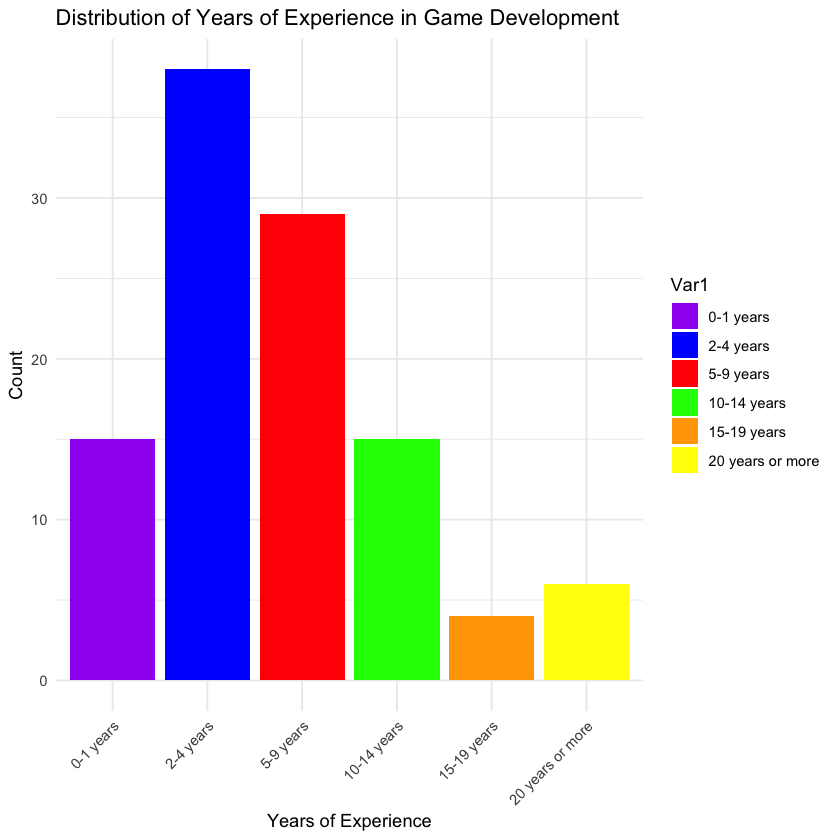

In [111]:
# Define the correct order for the levels
year_levels <- c(
  "0-1 years",
  "2-4 years",
  "5-9 years",
  "10-14 years",
  "15-19 years",
  "20 years or more"
)

# Convert the Years of experience column to a factor with specified levels
data[[7]] <- factor(data[[7]], levels = year_levels)

# Filter out 'Unknown' values
filtered_data <- data[!is.na(data[[7]]), ]

# Descriptive analysis: Distribution of years of experience
experience_distribution <- table(filtered_data[[7]])

# Plotting the distribution of years of experience
ggplot(
  as.data.frame(experience_distribution),
  aes(x = Var1, y = Freq, fill = Var1)
) +
  geom_bar(stat = "identity") +
  theme_minimal() +
  labs(
    title = "Distribution of Years of Experience in Game Development",
    x = "Years of Experience",
    y = "Count"
  ) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  scale_fill_manual(values = c(
    "purple",
    "blue",
    "red",
    "green",
    "orange",
    "yellow"
  ))


## Overall Stance on Generative AI

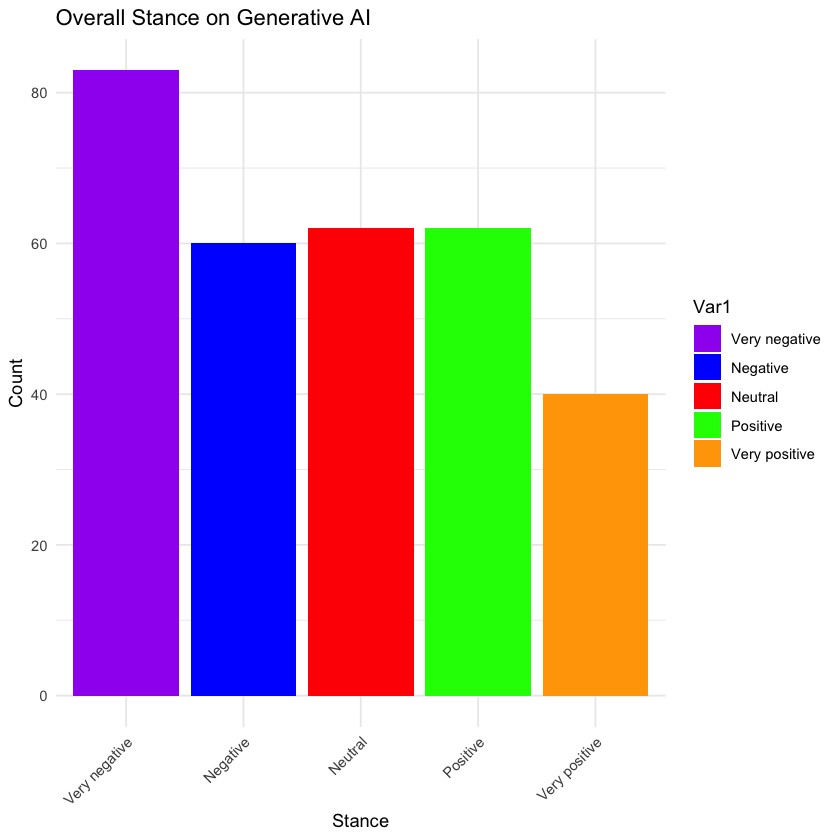

In [112]:
# Define the correct order for the levels
stance_levels <- c(
  "Very negative",
  "Negative",
  "Neutral",
  "Positive",
  "Very positive"
)

# Convert the 'Overall stance on Generative AI?2'
# column to a factor with specified levels
data[[10]] <- factor(data[[10]], levels = stance_levels)

# Exclude 'Unknown' values
filtered_data <- data[!is.na(data[[10]]), ]

# Descriptive analysis: Overall stance on Generative AI
stance_distribution <- table(filtered_data[[10]])

# Plotting the overall stance on Generative AI
ggplot(
  as.data.frame(stance_distribution),
  aes(x = Var1, y = Freq, fill = Var1)
) +
  geom_bar(stat = "identity") +
  theme_minimal() +
  labs(title = "Overall Stance on Generative AI", x = "Stance", y = "Count") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  scale_fill_manual(
    values = c(
      "purple",
      "blue",
      "red",
      "green",
      "orange"
    )
  )

## Correlation Analysis

In [113]:
# Convert categorical data to numeric for correlation analysis
data_numeric <- data %>%
  mutate(
    YearsExperience = case_when(
      .[[7]] == "0-1 years" ~ 1,
      .[[7]] == "2-4 years" ~ 2,
      .[[7]] == "5-9 years" ~ 3,
      .[[7]] == "10-14 years" ~ 4,
      .[[7]] == "15-19 years" ~ 5,
      .[[7]] == "20 years or more" ~ 6,
      TRUE ~ 0
    ),
    StanceOnGenAI = case_when(
      .[[10]] == "Very positive" ~ 5,
      .[[10]] == "Positive" ~ 4,
      .[[10]] == "Neutral" ~ 3,
      .[[10]] == "Negative" ~ 2,
      .[[10]] == "Very negative" ~ 1,
      TRUE ~ 0
    )
  )

# Calculate correlation
correlation <- cor(
  data_numeric$YearsExperience,
  data_numeric$StanceOnGenAI,
  method = "spearman",
  use = "complete.obs"
)

print(correlation)


[1] -0.08107992


### Interpretation of the Correlation Coefficient of -0.08107992:

#### Magnitude:
- The value of -0.08107992 is still very close to 0, suggesting that there is almost no linear relationship between the two variables.

#### Direction:
- The negative sign indicates that, as the years of experience increase, there is a slight tendency for the stance on Generative AI to become more negative. However, this tendency is still very weak.

#### Practical Significance:
- Given the small magnitude of the correlation coefficient, it is unlikely that this relationship has practical significance. In other words, years of experience in game development do not meaningfully predict the overall stance on Generative AI based on the survey data.

### Summary:
- **Correlation Coefficient:** -0.08107992
- **Magnitude:** Very weak linear relationship
- **Direction:** Slightly negative
- **Practical Significance:** Not meaningful

The key takeaway is that both correlation coefficients, -0.055264 and -0.08107992, are close to zero and indicate a very weak negative relationship. Neither value suggests a strong or practically significant relationship between years of experience in game development and the overall stance on Generative AI. Therefore, the conclusion remains the same: there is almost no meaningful linear relationship between these two variables in your survey data.

## Sentiment Analysis

### Wordcloud

#### "What do you think will be the most promising innovations from Generative AI in game development?" 

Warning message in tm_map.SimpleCorpus(corpus, tm::removePunctuation):
"transformation drops documents"
Warning message in tm_map.SimpleCorpus(corpus, function(x) tm::removeWords(x, tm::stopwords())):
"transformation drops documents"


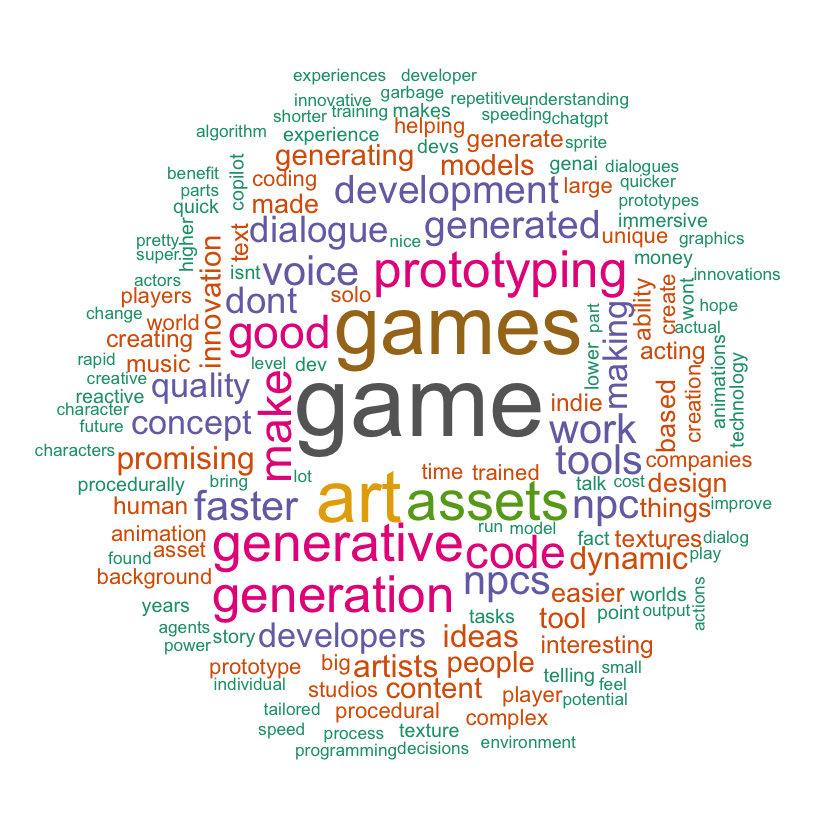

In [114]:
# Preprocess the text data
data[[45]] <- iconv(data[[45]], "latin1", "UTF-8") # Convert to UTF-8
data[[45]] <- tolower(data[[45]]) # Convert to lowercase
data[[45]] <- removePunctuation(data[[45]]) # Remove punctuation
data[[45]] <- removeNumbers(data[[45]]) # Remove numbers
data[[45]] <- removeWords(data[[45]], stopwords("smart")) # Remove stopwords
data[[45]] <- stripWhitespace(data[[45]]) # Remove extra whitespaces

# Create a wordcloud
wordcloud(
  data[[45]],
  colors = brewer.pal(8, "Dark2"),
  random.order = FALSE,
  scale = c(5, 0.5),
  max.words = 250
)

#### "What do you think will be the most negative consequences of Generative AI in game development?"

Warning message in tm_map.SimpleCorpus(corpus, tm::removePunctuation):
"transformation drops documents"
Warning message in tm_map.SimpleCorpus(corpus, function(x) tm::removeWords(x, tm::stopwords())):
"transformation drops documents"
Warning message in strwidth(words[i], cex = size[i], ...):
"skriftbredde ukendt for tegn 0x0"
Warning message in strwidth(words[i], cex = size[i], ...):
"skriftbredde ukendt for tegn 0x0"
Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
"skriftbredde ukendt for tegn 0x0"
Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
"skriftbredde ukendt for tegn 0x0"
Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
"maleenhed for skrifttype er ukendt for tegn 0x80"
Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
"maleenhed for skrifttype er ukendt for tegn 0x99"


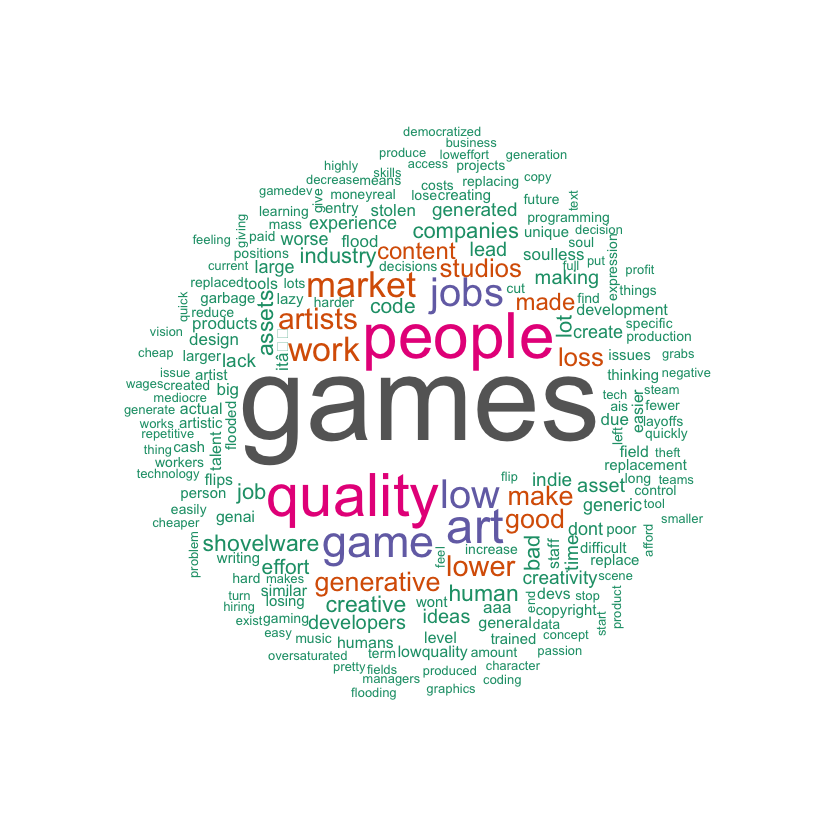

In [115]:
# wordcloud
# Preprocess the text data
data[[46]] <- iconv(data[[46]], "latin1", "UTF-8") # Convert to UTF-8
data[[46]] <- tolower(data[[46]]) # Convert to lowercase
data[[46]] <- removePunctuation(data[[46]]) # Remove punctuation
data[[46]] <- removeNumbers(data[[46]]) # Remove numbers
data[[46]] <- removeWords(data[[46]], stopwords("smart")) # Remove stopwords
data[[46]] <- stripWhitespace(data[[46]]) # Remove extra whitespaces

# Create a wordcloud
wordcloud(
  data[[46]],
  colors = brewer.pal(8, "Dark2"),
  random.order = FALSE,
  scale = c(6, .5),
  max.words = 250
)

# Show how many times each word appears
#word_freq <- table(unlist(strsplit(data[[46]], " ")))
#word_freq <- sort(word_freq, decreasing = TRUE)
#head(decreasing = TRUE, word_freq, 200)

       anger anticipation      disgust         fear          joy      sadness 
          23           87           22           28           85           48 
    surprise        trust     negative     positive 
          63          100           66          234 


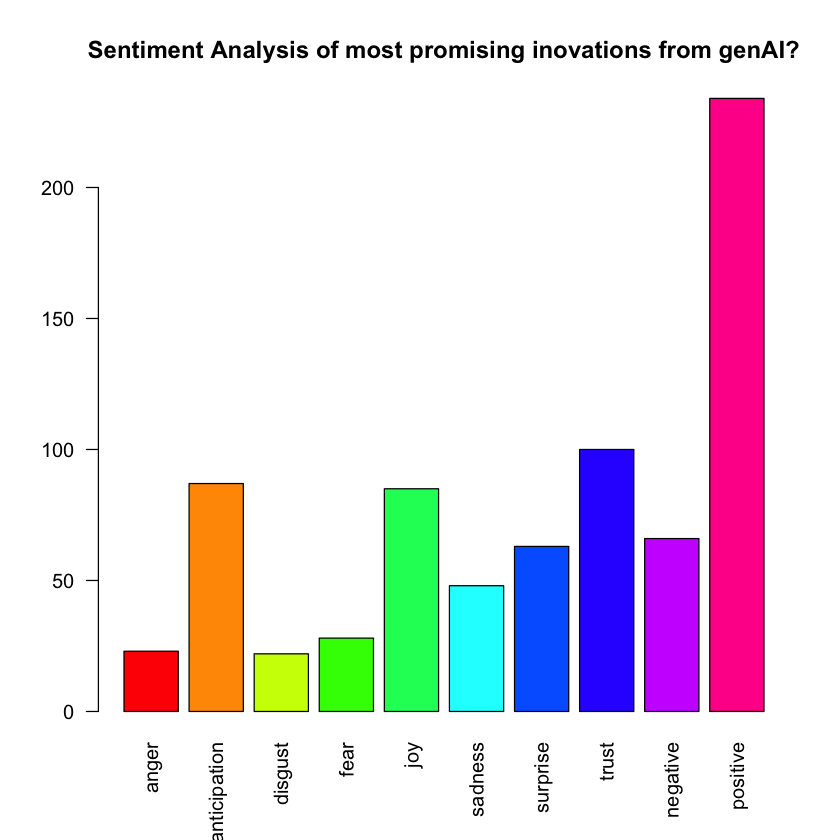

In [116]:
# Extract open-ended responses
open_ended_responses <- data[[45]]
# print(open_ended_responses)

# Perform sentiment analysis
sentiment_scores_0 <- get_nrc_sentiment(open_ended_responses)
# print(sentiment_scores_0)

# Summarize sentiment scores
sentiment_summary_0 <- colSums(sentiment_scores_0)
print(sentiment_summary_0)

# Plot sentiment scores
barplot(
  sentiment_summary_0,
  las = 2,
  col = rainbow(10),
  main = "Sentiment Analysis of most promising inovations from genAI?"
)


       anger anticipation      disgust         fear          joy      sadness 
          89          143           71          107          119          147 
    surprise        trust     negative     positive 
          83          137          226          329 


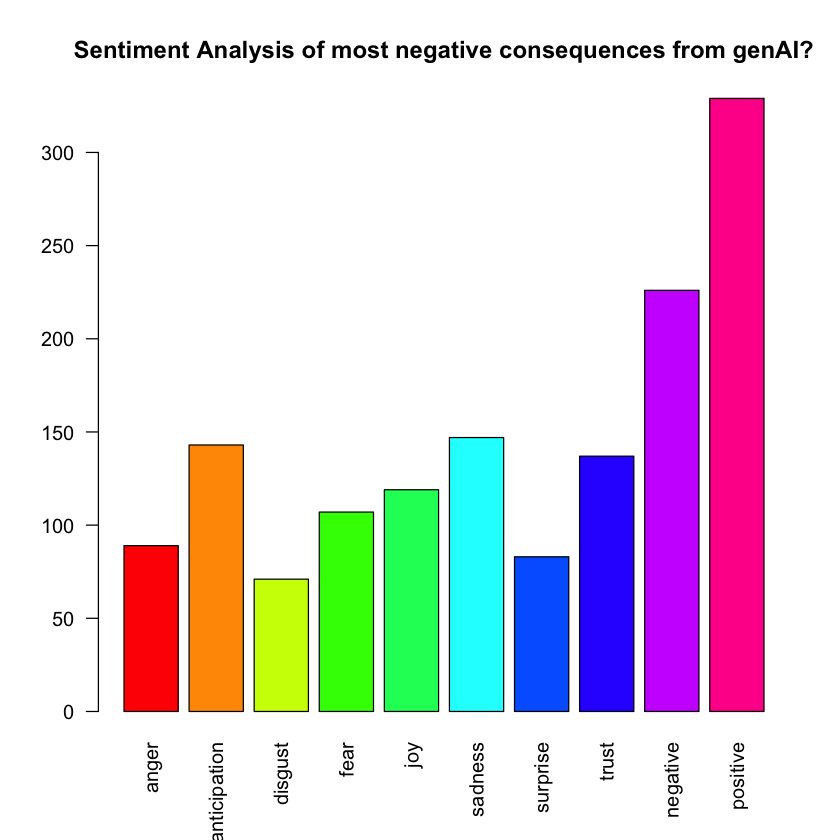

In [117]:
# Extract open-ended responses
open_ended_responses <- data[[46]]

# Perform sentiment analysis
sentiment_scores_1 <- get_nrc_sentiment(open_ended_responses)

# Summarize sentiment scores
sentiment_summary_1 <- colSums(sentiment_scores_1)
print(sentiment_summary_1)

# Plot sentiment scores
barplot(
  sentiment_summary_1,
  las = 2,
  col = rainbow(10),
  main = "Sentiment Analysis of most negative consequences from genAI?"
)

       anger anticipation      disgust         fear          joy      sadness 
          24           96           25           36           94           56 
    surprise        trust     negative     positive 
          42          117           75          276 


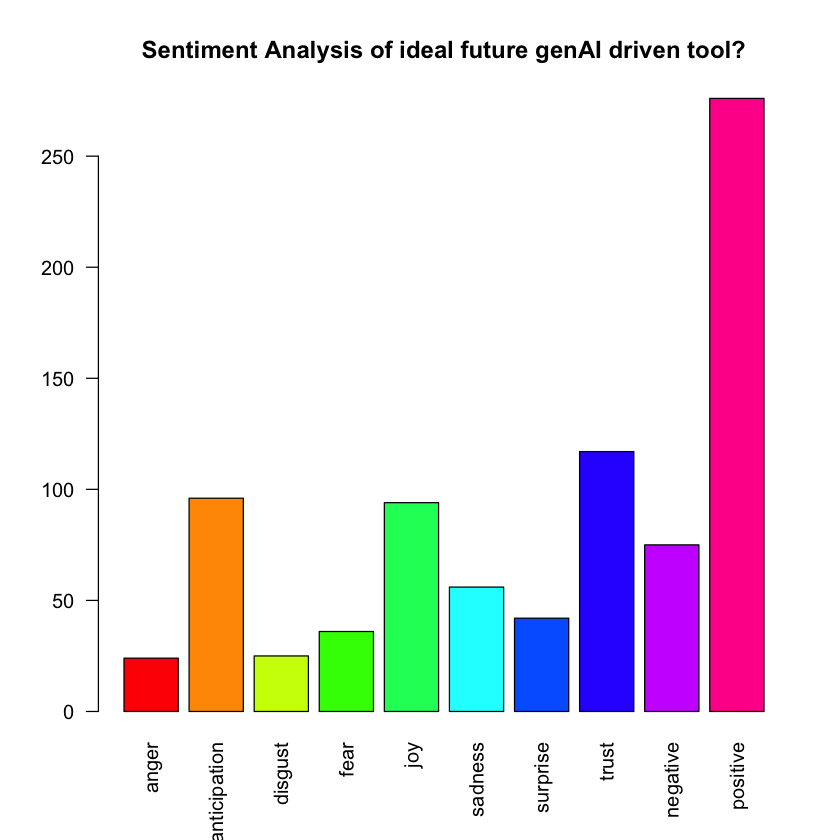

In [118]:
# Extract open-ended responses
open_ended_responses <- data[[50]]

# Perform sentiment analysis
sentiment_scores_2 <- get_nrc_sentiment(open_ended_responses)

# Summarize sentiment scores
sentiment_summary_2 <- colSums(sentiment_scores_2)
print(sentiment_summary_2)

# Plot sentiment scores
barplot(
  sentiment_summary_2,
  las = 2,
  col = rainbow(10),
  main = "Sentiment Analysis of ideal future genAI driven tool?"
)


       anger anticipation      disgust         fear          joy      sadness 
          23           59           26           32           43           44 
    surprise        trust     negative     positive 
          29           74           58          145 


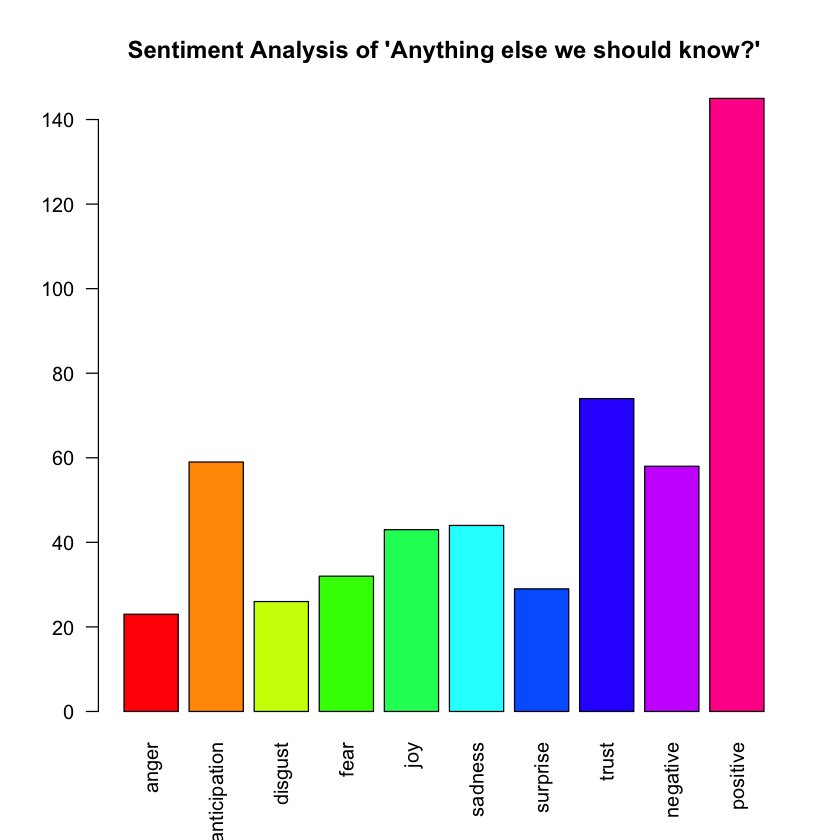

In [119]:
# Extract open-ended responses
open_ended_responses <- data[[52]]

# Perform sentiment analysis
sentiment_scores_3 <- get_nrc_sentiment(open_ended_responses)

# Summarize sentiment scores
sentiment_summary_3 <- colSums(sentiment_scores_3)
print(sentiment_summary_3)

# Plot sentiment scores
barplot(
  sentiment_summary_3,
  las = 2,
  col = rainbow(10),
  main = "Sentiment Analysis of 'Anything else we should know?'"
)


## Group Comparisons

[1] "Average stance on GenAI for professionals: 2.5981308411215"
[1] "Average stance on GenAI for hobbyists: 2.795"

	Welch Two Sample t-test

data:  professionals$StanceOnGenAI and hobbyists$StanceOnGenAI
t = -1.1712, df = 210.38, p-value = 0.2428
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.5282309  0.1344926
sample estimates:
mean of x mean of y 
 2.598131  2.795000 



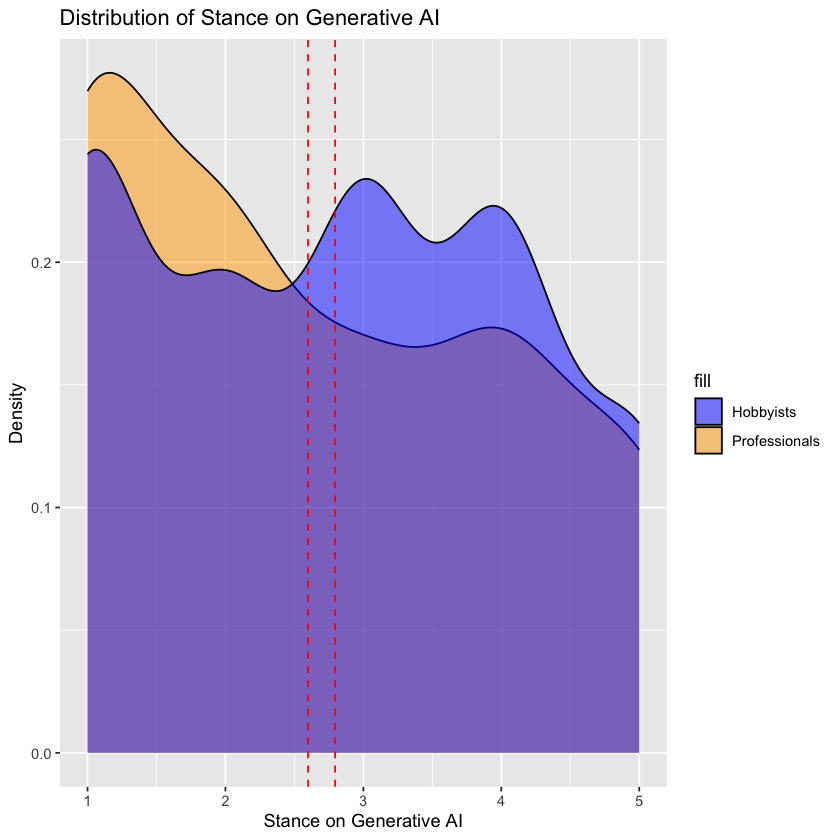

In [120]:
# Define the correct order for the levels
stance_levels <- c(
  "Very negative",
  "Negative",
  "Neutral",
  "Positive",
  "Very positive"
)

# Convert the 'Overall stance on GenAI' column to a factor with specified levels
data[[10]] <- factor(data[[10]], levels = stance_levels)

# Convert categorical data to numeric for stance on Generative AI
data <- data %>%
  mutate(
    StanceOnGenAI = case_when(
      .[[10]] == "Very positive" ~ 5,
      .[[10]] == "Positive" ~ 4,
      .[[10]] == "Neutral" ~ 3,
      .[[10]] == "Negative" ~ 2,
      .[[10]] == "Very negative" ~ 1,
      TRUE ~ NA_real_
    )
  )

# Filter data for professionals and hobbyists
professionals <- data %>% filter(data[[5]] == "Professional")
hobbyists <- data %>% filter(data[[5]] == "Hobbyist")

# Calculate average stance on Generative AI
avg_stance_professionals <- mean(professionals$StanceOnGenAI, na.rm = TRUE)
avg_stance_hobbyists <- mean(hobbyists$StanceOnGenAI, na.rm = TRUE)

print(
  paste(
    "Average stance on GenAI for professionals:",
    avg_stance_professionals
  )
)
print(
  paste(
    "Average stance on GenAI for hobbyists:",
    avg_stance_hobbyists
  )
)

# Perform a t-test to compare the average stance
# on Generative AI between professionals and hobbyists
t_test_result <- t.test(
  professionals$StanceOnGenAI,
  hobbyists$StanceOnGenAI,
  alternative = "two.sided",
  mu = 0,
  conf.level = 0.95
)

# Print the t-test results
print(t_test_result)

# visualize the t-test results
ggplot() +
  geom_density(
    aes(x = professionals$StanceOnGenAI, fill = "Professionals"),
    alpha = 0.5
  ) +
  geom_density(
    aes(x = hobbyists$StanceOnGenAI, fill = "Hobbyists"),
    alpha = 0.5
  ) +
  geom_vline(
    xintercept = t_test_result$estimate,
    color = "red",
    linetype = "dashed"
  ) +
  labs(
    title = "Distribution of Stance on Generative AI",
    x = "Stance on Generative AI",
    y = "Density"
  ) +
  scale_fill_manual(values = c("blue", "orange"))


## SKITSE
Explanation:
Convert Stance to Numeric: The StanceOnGenAI variable is converted to numeric values for easier computation.
Filter Data: Separate the data into professionals and hobbyists based on their response.
Calculate Averages: Compute the average stance for both professionals and hobbyists, excluding any missing values.
This code will give you the average stance on Generative AI for both professionals and hobbyists, allowing you to compare the perspectives of these two groups.

Let's break down the results of the Welch Two Sample t-test and interpret what they tell us.

### Welch Two Sample t-test Results

1. **Test Statistic (t)**:
   - `t = -1.1712`: This is the t-statistic, which measures the difference between the sample means relative to the variability of the samples.

2. **Degrees of Freedom (df)**:
   - `df = 210.38`: The degrees of freedom for the test. Welch's t-test does not assume equal variances between the groups, so the degrees of freedom are adjusted accordingly.

3. **p-value**:
   - `p-value = 0.2428`: This is the probability of observing a test statistic as extreme as, or more extreme than, the observed value under the null hypothesis. A high p-value indicates that the observed difference is not statistically significant.

4. **Alternative Hypothesis**:
   - `alternative hypothesis: true difference in means is not equal to 0`: The test is checking if there is a significant difference between the means of the two groups.

5. **95 Percent Confidence Interval**:
   - `95 percent confidence interval: -0.5282309  0.1344926`: This interval estimates the range within which the true difference in means lies with 95% confidence. Since the interval includes 0, it suggests that there is no significant difference between the means.

6. **Sample Estimates**:
   - `mean of x = 2.598131`: The mean stance on GenAI for professionals.
   - `mean of y = 2.795000`: The mean stance on GenAI for hobbyists.

### Interpretation

1. **Difference in Means**:
   - The mean stance on GenAI for professionals is 2.598131, while for hobbyists, it is 2.795000. The difference in means is relatively small.

2. **Statistical Significance**:
   - The p-value of 0.2428 is greater than the common significance level (e.g., 0.05). This means we fail to reject the null hypothesis and conclude that there is no statistically significant difference in the mean stance on GenAI between professionals and hobbyists.

3. **Confidence Interval**:
   - The 95% confidence interval for the difference in means is from -0.5282309 to 0.1344926. Since this interval includes 0, it further supports the conclusion that there is no significant difference between the two groups.

### Summary

The Welch Two Sample t-test indicates that there is no statistically significant difference in the mean stance on GenAI between professionals and hobbyists. The p-value is high, and the confidence interval includes 0, both suggesting that any observed difference in means is likely due to random variation rather than a true difference.

### References

- Welch, B. L. (1947). The generalization of "Student's" problem when several different population variances are involved. *Biometrika*, 34(1-2), 28-35.
- R Core Team. (2021). *R: A language and environment for statistical computing*. R Foundation for Statistical Computing, Vienna, Austria. URL https://www.R-project.org/.

If you have more questions or need further clarification, feel free to ask!

### Stance on Generative AI vs. Years of Experience

We'll be working with [7] "Years of experience in game development?" and [10] "Overall stance on Generative AI?2"

In [121]:
# Konverter relevante kolonner til faktorer
data <- data %>%
  mutate(
    ExperienceGroup = factor(data[[7]]),
    StanceOnGenAI = as.numeric(data[[10]])
  )

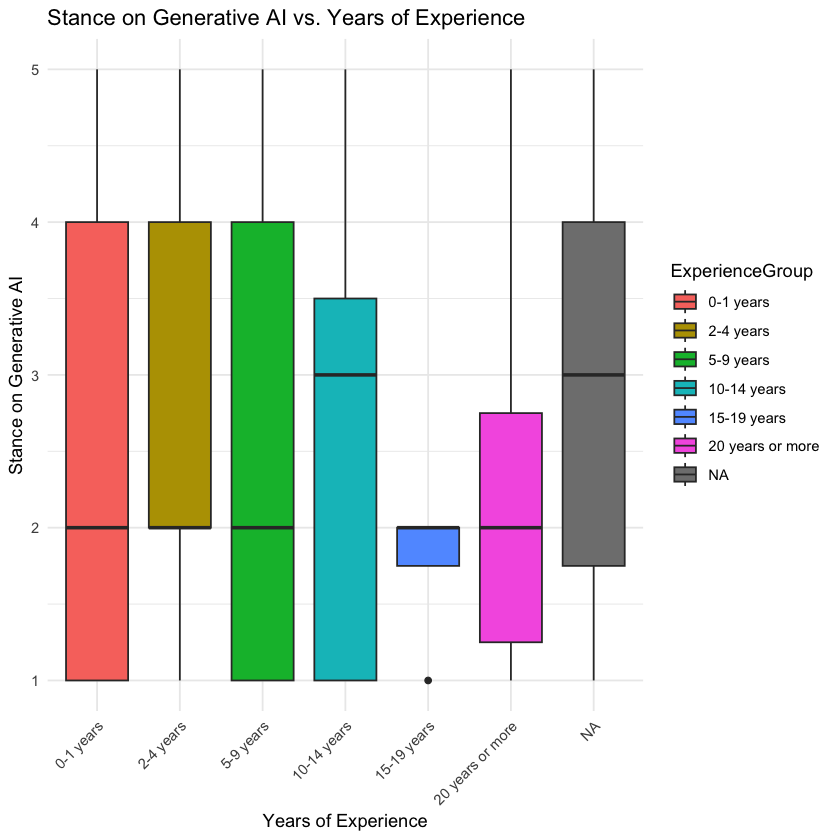

In [122]:
# Boxplot for Stance on GenAI vs. Experience Group
ggplot(
  data, aes(
    x = ExperienceGroup,
    y = StanceOnGenAI,
    fill = ExperienceGroup
  )
) +
  geom_boxplot() +
  theme_minimal() +
  labs(
    title = "Stance on Generative AI vs. Years of Experience",
    x = "Years of Experience",
    y = "Stance on Generative AI"
  ) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

In [123]:
# ANOVA test for Stance on GenAI vs. Experience Group
anova_result <- aov(StanceOnGenAI ~ ExperienceGroup, data = data)
summary(anova_result)

Warning message in terms.formula(formula, "Error", data = data):
"unable to translate 'Which areas do you think are less<U+00A0>' to native encoding"
Warning message in terms.formula(formula, data = data):
"unable to translate 'Which areas do you think are less<U+00A0>' to native encoding"
Warning message in eval(predvars, data, env):
"unable to translate 'Which areas do you think are less<U+00A0>' to native encoding"
Warning message in eval(extras, data, env):
"unable to translate 'Which areas do you think are less<U+00A0>' to native encoding"
Warning message in eval(substitute(subset), data, env):
"unable to translate 'Which areas do you think are less<U+00A0>' to native encoding"


                 Df Sum Sq Mean Sq F value Pr(>F)
ExperienceGroup   5   4.11   0.823   0.397   0.85
Residuals       101 209.60   2.075               
200 observations deleted due to missingness

### Main area of work VS Stance on GenAI
Here it's [6] "Primary area of work?" and [10] "Overall stance on Generative AI?2"

## SKITSE

### 1. Erfaring vs. Holdning til Generativ AI

#### Dataforberedelse:
Først skal vi sikre, at dataene er i den rette form, og at kolonnerne er korrekt kodet.

```r
# Load necessary libraries
library(dplyr)
library(ggplot2)

# Antag, at data er din data frame
# Konverter relevante kolonner til faktorer
data <- data %>%
  mutate(
    ExperienceGroup = factor(`Years of experience in game development?`),
    StanceOnGenAI = as.numeric(`Overall stance on Generative AI?2`)
  )
```

#### Boxplot:
Visualiser holdningen til Generativ AI for forskellige erfaringsgrupper ved hjælp af et boxplot.

```r
# Boxplot for Stance on GenAI vs. Experience Group
ggplot(data, aes(x=ExperienceGroup, y=StanceOnGenAI, fill=ExperienceGroup)) +
  geom_boxplot() +
  theme_minimal() +
  labs(title="Stance on Generative AI vs. Years of Experience",
       x="Years of Experience",
       y="Stance on Generative AI") +
  theme(axis.text.x=element_text(angle=45, hjust=1))
```

#### T-test:
For at teste om der er signifikante forskelle mellem grupperne, kan du bruge en ANOVA-test (Analysis of Variance).

```r
# ANOVA test for Stance on GenAI vs. Experience Group
anova_result <- aov(StanceOnGenAI ~ ExperienceGroup, data=data)
summary(anova_result)
```

### 2. Jobrolle vs. Holdning til Generativ AI

#### Dataforberedelse:
Sørg for, at kolonnen for jobroller er korrekt kodet.

```r
# Konverter relevante kolonner til faktorer
data <- data %>%
  mutate(
    JobRole = factor(`Primary job role in game development?`),
    StanceOnGenAI = as.numeric(`Overall stance on Generative AI?2`)
  )
```

#### Boxplot:
Visualiser holdningen til Generativ AI for forskellige jobroller ved hjælp af et boxplot.

```r
# Boxplot for Stance on GenAI vs. Job Role
ggplot(data, aes(x=JobRole, y=StanceOnGenAI, fill=JobRole)) +
  geom_boxplot() +
  theme_minimal() +
  labs(title="Stance on Generative AI vs. Job Role",
       x="Job Role",
       y="Stance on Generative AI") +
  theme(axis.text.x=element_text(angle=45, hjust=1))
```

#### ANOVA-test:
For at teste om der er signifikante forskelle mellem grupperne, kan du bruge en ANOVA-test.

```r
# ANOVA test for Stance on GenAI vs. Job Role
anova_result_jobrole <- aov(StanceOnGenAI ~ JobRole, data=data)
summary(anova_result_jobrole)
```

### 3. Brug af Generativ AI vs. Holdning til Generativ AI

#### Dataforberedelse:
Sørg for, at kolonnen for brug af Generativ AI er korrekt kodet.

```r
# Konverter relevante kolonner til faktorer
data <- data %>%
  mutate(
    UsesGenAI = factor(`Do you use Generative AI in your work?`),
    StanceOnGenAI = as.numeric(`Overall stance on Generative AI?2`)
  )
```

#### Boxplot:
Visualiser holdningen til Generativ AI mellem dem, der bruger teknologien, og dem der ikke gør, ved hjælp af et boxplot.

```r
# Boxplot for Stance on GenAI vs. Uses GenAI
ggplot(data, aes(x=UsesGenAI, y=StanceOnGenAI, fill=UsesGenAI)) +
  geom_boxplot() +
  theme_minimal() +
  labs(title="Stance on Generative AI vs. Uses Generative AI",
       x="Uses Generative AI",
       y="Stance on Generative AI") +
  theme(axis.text.x=element_text(angle=45, hjust=1))
```

#### T-test:
For at teste om der er signifikante forskelle mellem dem, der bruger Generativ AI, og dem der ikke gør, kan du bruge en t-test.

```r
# T-test for Stance on GenAI vs. Uses GenAI
t_test_result <- t.test(StanceOnGenAI ~ UsesGenAI, data=data)
print(t_test_result)
```

### Konklusion:
- **Erfaring vs. Holdning til Generativ AI**: Brug boxplots og ANOVA for at sammenligne holdninger på tværs af forskellige erfaringsniveauer.
- **Jobrolle vs. Holdning til Generativ AI**: Brug boxplots og ANOVA for at sammenligne holdninger mellem forskellige jobroller.
- **Brug af Generativ AI vs. Holdning til Generativ AI**: Brug boxplots og t-test for at sammenligne holdninger mellem dem, der bruger Generativ AI, og dem der ikke gør.

Disse analyser vil give dig indsigt i, hvordan forskellige grupper inden for spilindustrien opfatter og bruger Generativ AI. Hvis du har brug for yderligere hjælp med at udføre analyserne eller fortolke resultaterne, er du velkommen til at spørge!

Warning message in terms.formula(formula, data = data):
"unable to translate 'Which areas do you think are less<U+00A0>' to native encoding"
Warning message in eval(predvars, data, env):
"unable to translate 'Which areas do you think are less<U+00A0>' to native encoding"
Warning message in eval(extras, data, env):
"unable to translate 'Which areas do you think are less<U+00A0>' to native encoding"
Warning message in eval(substitute(subset), data, env):
"unable to translate 'Which areas do you think are less<U+00A0>' to native encoding"



	Welch Two Sample t-test

data:  StanceOnGenAI by UsesGenAI
t = -12.196, df = 251.95, p-value < 2.2e-16
alternative hypothesis: true difference in means between group No and group Yes is not equal to 0
95 percent confidence interval:
 -1.891231 -1.365338
sample estimates:
 mean in group No mean in group Yes 
         2.100529          3.728814 



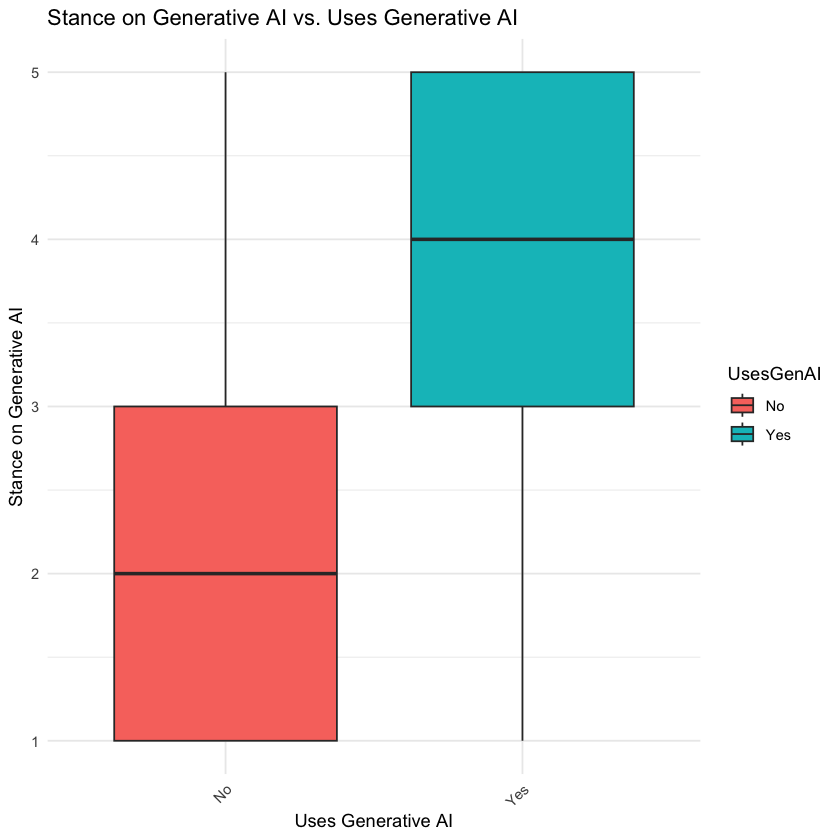

In [124]:
# Konverter relevante kolonner til faktorer
data <- data %>%
  mutate(
    UsesGenAI = factor(`Do you use Generative AI in your work?`),
    StanceOnGenAI = as.numeric(`Overall stance on Generative AI?2`)
  )
# Boxplot for Stance on GenAI vs. Uses GenAI
ggplot(data, aes(x=UsesGenAI, y=StanceOnGenAI, fill=UsesGenAI)) +
  geom_boxplot() +
  theme_minimal() +
  labs(title="Stance on Generative AI vs. Uses Generative AI",
       x="Uses Generative AI",
       y="Stance on Generative AI") +
  theme(axis.text.x=element_text(angle=45, hjust=1))

# T-test for Stance on GenAI vs. Uses GenAI
t_test_result <- t.test(StanceOnGenAI ~ UsesGenAI, data=data)
print(t_test_result)

Based on the results of the t-test and the boxplot, we can make several conclusions about the relationship between the use of Generative AI and the stance on Generative AI among the survey respondents.

### T-test Results
- **t-value**: -12.196
- **Degrees of Freedom (df)**: 251.95
- **p-value**: < 2.2e-16
- **Confidence Interval (95%)**: [-1.891231, -1.365338]
- **Mean in Group No**: 2.100529
- **Mean in Group Yes**: 3.728814

### Interpretation of the T-test Results
1. **Statistical Significance**:
   - The p-value is less than 0.05 (p-value < 2.2e-16), which indicates that there is a statistically significant difference between the stances on Generative AI for those who use it and those who do not.
   - The null hypothesis (that there is no difference in the mean stance between the two groups) is rejected.

2. **Direction of the Difference**:
   - The negative t-value (-12.196) indicates that the mean stance on Generative AI is lower for those who do not use it compared to those who do use it.
   - Specifically, the mean stance for those who do not use Generative AI is 2.100529, while the mean stance for those who do use it is 3.728814.

3. **Practical Significance**:
   - The confidence interval for the difference in means [-1.891231, -1.365338] does not include 0, further indicating a significant difference.
   - The magnitude of the difference in means (approximately 1.6) suggests that there is a considerable practical difference in how Generative AI is perceived by users and non-users.

### Boxplot Interpretation
The boxplot should visually display the distribution of stances on Generative AI for the two groups:
- **No**: Respondents who do not use Generative AI.
- **Yes**: Respondents who do use Generative AI.

From the boxplot:
- We would expect to see that the median stance on Generative AI is higher for the "Yes" group compared to the "No" group.
- The interquartile range (IQR) for each group can give us insights into the variability within each group.

### Conclusion
- **Statistically Significant Difference**: There is a statistically significant difference in the stance on Generative AI between those who use it and those who do not.
- **Higher Mean Stance Among Users**: Respondents who use Generative AI have a significantly higher and more positive stance on Generative AI compared to those who do not use it.
- **Practical Implication**: The significant difference in means indicates that using Generative AI may lead to a more positive perception of its benefits and utility.

This analysis suggests that familiarity and experience with Generative AI can positively influence one's stance on its usefulness and application in game development.

# A tibble: 2 x 9
  UsesGenAI MeanShortenTimelines MeanIndividualizedExperien~1 MeanImpactStaffing
  <fct>                    <dbl>                        <dbl>              <dbl>
1 No                        2.85                         2.14               4.12
2 Yes                       4.01                         3.36               3.99
# i abbreviated name: 1: MeanIndividualizedExperiences
# i 5 more variables: MeanSmallerTeams <dbl>, MeanDemocratizeDevelopment <dbl>,
#   MeanCheaperDevelopment <dbl>, MeanLowerQuality <dbl>, MeanBetterGames <dbl>


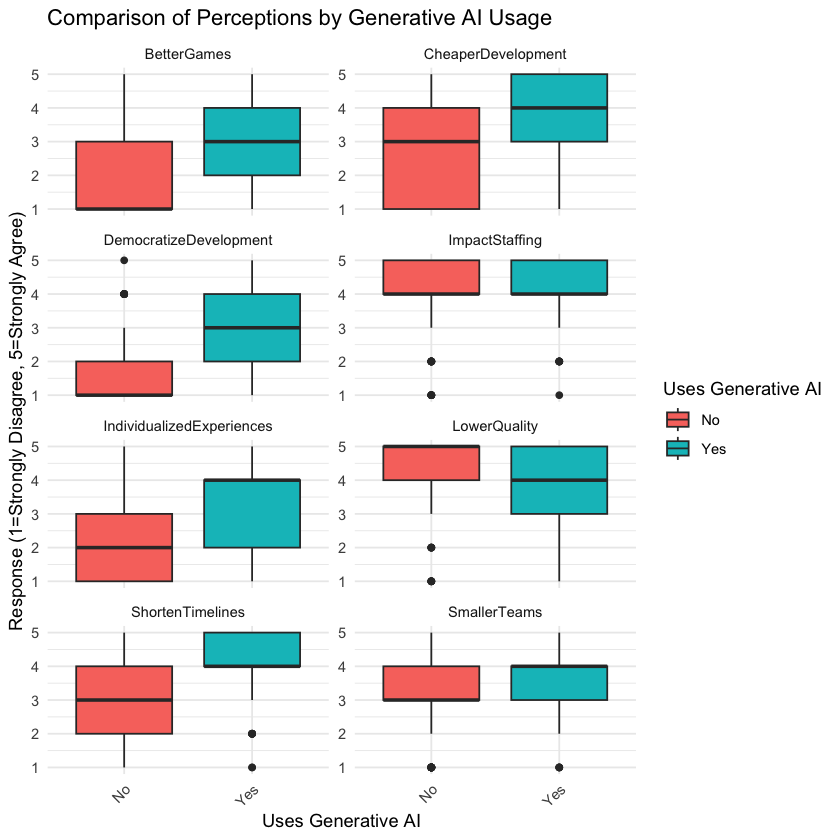

In [125]:
# Load necessary libraries
library(dplyr)
library(ggplot2)
library(tidyr)

# Assuming `data` is your main dataframe

# Convert relevant columns to numeric
data <- data %>%
  mutate(
    UsesGenAI = factor(`Do you use Generative AI in your work?`),
    ShortenTimelines = as.numeric(factor(`It will help shorten development timelines`, levels = c("Strongly disagree", "Disagree", "Neutral", "Agree", "Strongly agree"))),
    IndividualizedExperiences = as.numeric(factor(`It will lead to more individualized gaming experiences`, levels = c("Strongly disagree", "Disagree", "Neutral", "Agree", "Strongly agree"))),
    ImpactStaffing = as.numeric(factor(`It will impact staffing decisions`, levels = c("Strongly disagree", "Disagree", "Neutral", "Agree", "Strongly agree"))),
    SmallerTeams = as.numeric(factor(`It will lead to smaller team sizes`, levels = c("Strongly disagree", "Disagree", "Neutral", "Agree", "Strongly agree"))),
    DemocratizeDevelopment = as.numeric(factor(`It will democratize game development`, levels = c("Strongly disagree", "Disagree", "Neutral", "Agree", "Strongly agree"))),
    CheaperDevelopment = as.numeric(factor(`It will make it cheaper to develop games`, levels = c("Strongly disagree", "Disagree", "Neutral", "Agree", "Strongly agree"))),
    LowerQuality = as.numeric(factor(`It will lead to lower quality games`, levels = c("Strongly disagree", "Disagree", "Neutral", "Agree", "Strongly agree"))),
    BetterGames = as.numeric(factor(`It will lead to better games`, levels = c("Strongly disagree", "Disagree", "Neutral", "Agree", "Strongly agree")))
  )

# Calculate mean responses for each question grouped by UsesGenAI
mean_responses <- data %>%
  group_by(UsesGenAI) %>%
  summarise(
    MeanShortenTimelines = mean(ShortenTimelines, na.rm = TRUE),
    MeanIndividualizedExperiences = mean(IndividualizedExperiences, na.rm = TRUE),
    MeanImpactStaffing = mean(ImpactStaffing, na.rm = TRUE),
    MeanSmallerTeams = mean(SmallerTeams, na.rm = TRUE),
    MeanDemocratizeDevelopment = mean(DemocratizeDevelopment, na.rm = TRUE),
    MeanCheaperDevelopment = mean(CheaperDevelopment, na.rm = TRUE),
    MeanLowerQuality = mean(LowerQuality, na.rm = TRUE),
    MeanBetterGames = mean(BetterGames, na.rm = TRUE)
  )

print(mean_responses)

# Pivot the data to a long format for plotting
data_long <- data %>%
  pivot_longer(cols = starts_with("ShortenTimelines"):starts_with("BetterGames"),
               names_to = "Question",
               values_to = "Response")

# Improve the plot layout and labels
ggplot(data_long, aes(x = UsesGenAI, y = Response, fill = UsesGenAI)) +
  geom_boxplot() +
  facet_wrap(~ Question, scales = "free_y", ncol = 2) +
  theme_minimal() +
  labs(title = "Comparison of Perceptions by Generative AI Usage",
       x = "Uses Generative AI",
       y = "Response (1=Strongly Disagree, 5=Strongly Agree)",
       fill = "Uses Generative AI") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))




### Interpretation of the Plot

Based on the boxplots, you can draw several conclusions:

1. **Better Games**: Respondents who use Generative AI tend to agree more that it leads to better games compared to those who do not use it.
2. **Cheaper Development**: There is a notable difference in the perception that Generative AI will make game development cheaper, with users of Generative AI agreeing more.
3. **Democratize Development**: Users of Generative AI are more likely to agree that it democratizes game development.
4. **Lower Quality**: There is a significant spread in opinions on whether Generative AI leads to lower quality games among users and non-users.
5. **Impact Staffing**: Both users and non-users seem to agree similarly on the impact on staffing decisions.
6. **Individualized Experiences**: Users of Generative AI agree more that it leads to more individualized gaming experiences.
7. **Shorten Timelines**: Users of Generative AI are more likely to agree that it shortens development timelines.
8. **Smaller Teams**: There is a smaller difference between users and non-users regarding whether Generative AI will lead to smaller team sizes.

The plots help visualize the differences in perceptions between the two groups, highlighting areas where Generative AI users have a more positive view compared to non-users. If the data and mean calculations are correct, these visual insights are valid. If there are specific questions or further analyses needed, please let me know!

# A tibble: 3 x 9
  LeadRole MeanShortenTimelines MeanIndividualizedExperiences MeanImpactStaffing
  <fct>                   <dbl>                         <dbl>              <dbl>
1 No                       3.36                          2.89               4.20
2 Yes                      3.14                          2.32               3.86
3 Hobbyist                 3.33                          2.64               4.11
# i 5 more variables: MeanSmallerTeams <dbl>, MeanDemocratizeDevelopment <dbl>,
#   MeanCheaperDevelopment <dbl>, MeanLowerQuality <dbl>, MeanBetterGames <dbl>


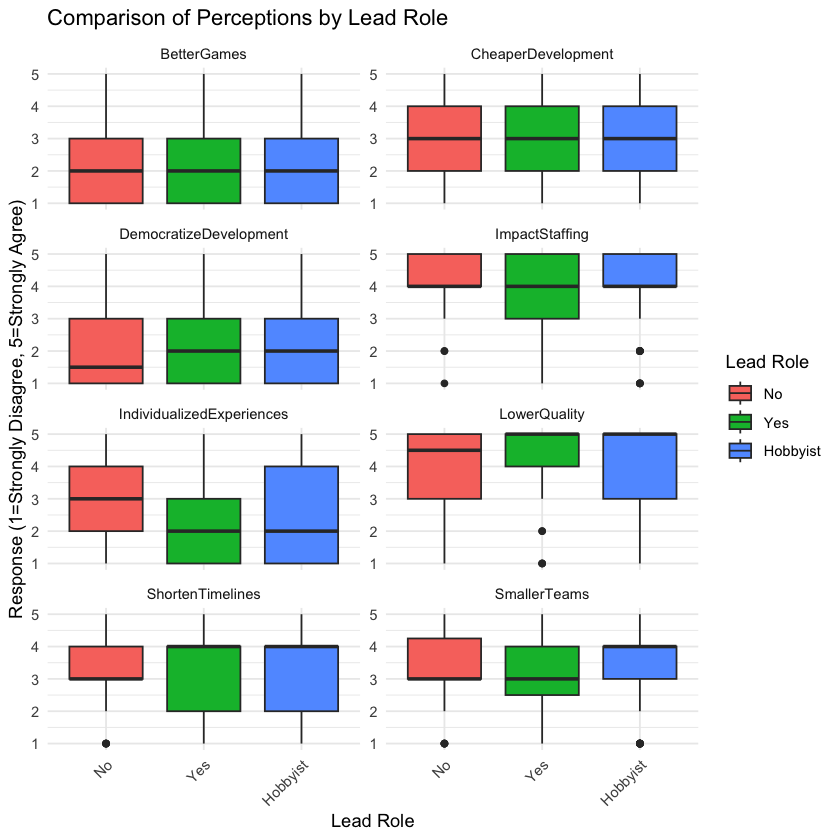

In [126]:
# Load necessary libraries
library(dplyr)
library(ggplot2)
library(tidyr)

# Assuming `data` is your main dataframe

# Convert relevant columns to factors and numeric
data <- data %>%
  mutate(
    LeadRole = ifelse(is.na(`Are you in a lead role?`), "Hobbyist", as.character(`Are you in a lead role?`)),
    LeadRole = factor(LeadRole, levels = c("No", "Yes", "Hobbyist")),
    ShortenTimelines = as.numeric(factor(`It will help shorten development timelines`, levels = c("Strongly disagree", "Disagree", "Neutral", "Agree", "Strongly agree"))),
    IndividualizedExperiences = as.numeric(factor(`It will lead to more individualized gaming experiences`, levels = c("Strongly disagree", "Disagree", "Neutral", "Agree", "Strongly agree"))),
    ImpactStaffing = as.numeric(factor(`It will impact staffing decisions`, levels = c("Strongly disagree", "Disagree", "Neutral", "Agree", "Strongly agree"))),
    SmallerTeams = as.numeric(factor(`It will lead to smaller team sizes`, levels = c("Strongly disagree", "Disagree", "Neutral", "Agree", "Strongly agree"))),
    DemocratizeDevelopment = as.numeric(factor(`It will democratize game development`, levels = c("Strongly disagree", "Disagree", "Neutral", "Agree", "Strongly agree"))),
    CheaperDevelopment = as.numeric(factor(`It will make it cheaper to develop games`, levels = c("Strongly disagree", "Disagree", "Neutral", "Agree", "Strongly agree"))),
    LowerQuality = as.numeric(factor(`It will lead to lower quality games`, levels = c("Strongly disagree", "Disagree", "Neutral", "Agree", "Strongly agree"))),
    BetterGames = as.numeric(factor(`It will lead to better games`, levels = c("Strongly disagree", "Disagree", "Neutral", "Agree", "Strongly agree")))
  )

# Calculate mean responses for each question grouped by LeadRole
mean_responses_lead <- data %>%
  group_by(LeadRole) %>%
  summarise(
    MeanShortenTimelines = mean(ShortenTimelines, na.rm = TRUE),
    MeanIndividualizedExperiences = mean(IndividualizedExperiences, na.rm = TRUE),
    MeanImpactStaffing = mean(ImpactStaffing, na.rm = TRUE),
    MeanSmallerTeams = mean(SmallerTeams, na.rm = TRUE),
    MeanDemocratizeDevelopment = mean(DemocratizeDevelopment, na.rm = TRUE),
    MeanCheaperDevelopment = mean(CheaperDevelopment, na.rm = TRUE),
    MeanLowerQuality = mean(LowerQuality, na.rm = TRUE),
    MeanBetterGames = mean(BetterGames, na.rm = TRUE)
  )

print(mean_responses_lead)

# Pivot the data to a long format for plotting
data_long_lead <- data %>%
  pivot_longer(cols = starts_with("ShortenTimelines"):starts_with("BetterGames"),
               names_to = "Question",
               values_to = "Response")

# Plot each question in a facet grid
ggplot(data_long_lead, aes(x = LeadRole, y = Response, fill = LeadRole)) +
  geom_boxplot() +
  facet_wrap(~ Question, scales = "free_y", ncol = 2) +
  theme_minimal() +
  labs(title = "Comparison of Perceptions by Lead Role",
       x = "Lead Role",
       y = "Response (1=Strongly Disagree, 5=Strongly Agree)",
       fill = "Lead Role") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))


Based on the plot, we can draw several conclusions about the perceptions of Generative AI across different roles (No, Yes, Hobbyist) for various aspects. Here's a detailed analysis:

### BetterGames
- **Lead Roles (Yes)** and **Non-Lead Roles (No)**: Both groups have similar median responses, indicating that both lead roles and non-lead roles generally agree or are neutral about Generative AI leading to better games.
- **Hobbyists**: They also show a similar distribution, though there seems to be a slightly wider range of opinions.

### CheaperDevelopment
- **Lead Roles (Yes)** and **Non-Lead Roles (No)**: Both groups have similar distributions, with a tendency towards agreeing that Generative AI will make development cheaper.
- **Hobbyists**: They also seem to agree with the statement, with a similar distribution as the other two groups.

### DemocratizeDevelopment
- **Lead Roles (Yes)**: This group has a median around the neutral to agree range, suggesting a moderate agreement that Generative AI democratizes development.
- **Non-Lead Roles (No)** and **Hobbyists**: These groups also have similar medians but with a wider spread, indicating more diverse opinions.

### ImpactStaffing
- **Lead Roles (Yes)**: This group seems to agree more that Generative AI will impact staffing decisions.
- **Non-Lead Roles (No)** and **Hobbyists**: Non-lead roles show a wider range of opinions, while hobbyists have a similar median but a wider spread.

### IndividualizedExperiences
- **Lead Roles (Yes)** and **Non-Lead Roles (No)**: Both groups are similar, with a slight tendency towards agreeing that Generative AI will lead to more individualized gaming experiences.
- **Hobbyists**: They seem to agree more strongly with this statement compared to the other groups.

### LowerQuality
- **Lead Roles (Yes)**: This group is more neutral to disagree about Generative AI leading to lower quality games.
- **Non-Lead Roles (No)**: This group shows more agreement with the statement, indicating a concern that Generative AI could lead to lower quality games.
- **Hobbyists**: This group has a wide range of opinions, but with a central tendency towards neutrality.

### ShortenTimelines
- **Lead Roles (Yes)** and **Non-Lead Roles (No)**: Both groups generally agree that Generative AI will shorten development timelines.
- **Hobbyists**: They also show agreement with the statement, similar to the other groups.

### SmallerTeams
- **Lead Roles (Yes)** and **Non-Lead Roles (No)**: Both groups have similar distributions, indicating neutrality or slight agreement that Generative AI will lead to smaller team sizes.
- **Hobbyists**: They show a wider range of opinions but a similar median.

### Summary of Insights
- **Overall Agreement**: Across most questions, both lead and non-lead roles generally agree or are neutral about the positive impacts of Generative AI, such as democratizing development, making it cheaper, shortening timelines, and leading to better games.
- **Hobbyists' Opinions**: Hobbyists tend to have a wider range of opinions, but generally align with lead and non-lead roles in many aspects.
- **Impact on Staffing and Quality**: There are more varied opinions on whether Generative AI will impact staffing decisions and lead to lower quality games, with non-lead roles showing more concern about quality.

These insights suggest that while there is general agreement on the benefits of Generative AI, concerns about quality and staffing impact vary more widely, especially among those not in lead roles. Hobbyists' views also reflect this diversity, indicating they might have different experiences or levels of exposure to Generative AI in game development.

In [127]:
# Filter out hobbyists for the t-tests
data_filtered <- data %>%
  filter(LeadRole %in% c("No", "Yes"))

# Perform t-tests for each question
t_test_results <- list()

questions <- c("ShortenTimelines", "IndividualizedExperiences", "ImpactStaffing", "SmallerTeams", "DemocratizeDevelopment", "CheaperDevelopment", "LowerQuality", "BetterGames")

for (question in questions) {
  t_test_result <- t.test(get(question) ~ LeadRole, data = data_filtered)
  t_test_results[[question]] <- t_test_result
}

# Print t-test results
for (question in questions) {
  print(paste("T-test for", question))
  print(t_test_results[[question]])
}

Warning message in terms.formula(formula, data = data):
"unable to translate 'Which areas do you think are less<U+00A0>' to native encoding"
Warning message in terms.formula(formula, data = data):
"unable to translate 'Which areas do you think are less<U+00A0>' to native encoding"
Warning message in eval(predvars, data, env):
"unable to translate 'Which areas do you think are less<U+00A0>' to native encoding"
Warning message in eval(extras, data, env):
"unable to translate 'Which areas do you think are less<U+00A0>' to native encoding"
Warning message in eval(substitute(subset), data, env):
"unable to translate 'Which areas do you think are less<U+00A0>' to native encoding"
Warning message in terms.formula(formula, data = data):
"unable to translate 'Which areas do you think are less<U+00A0>' to native encoding"
Warning message in terms.formula(formula, data = data):
"unable to translate 'Which areas do you think are less<U+00A0>' to native encoding"
Warning message in eval(predvars, d

[1] "T-test for ShortenTimelines"

	Welch Two Sample t-test

data:  get(question) by LeadRole
t = 0.90523, df = 92.772, p-value = 0.3677
alternative hypothesis: true difference in means between group No and group Yes is not equal to 0
95 percent confidence interval:
 -0.2635614  0.7051199
sample estimates:
 mean in group No mean in group Yes 
         3.363636          3.142857 

[1] "T-test for IndividualizedExperiences"

	Welch Two Sample t-test

data:  get(question) by LeadRole
t = 2.2615, df = 90.679, p-value = 0.02612
alternative hypothesis: true difference in means between group No and group Yes is not equal to 0
95 percent confidence interval:
 0.06918259 1.06862405
sample estimates:
 mean in group No mean in group Yes 
         2.886364          2.317460 

[1] "T-test for ImpactStaffing"

	Welch Two Sample t-test

data:  get(question) by LeadRole
t = 1.7029, df = 101.76, p-value = 0.09163
alternative hypothesis: true difference in means between group No and group Yes is not equ

The warnings you received are related to encoding issues with some of the column names in your dataframe. This can occur when there are special or non-ASCII characters in the column names. However, these warnings do not impact the t-test results, which are displayed correctly.

### Interpretation of T-test Results

Here is a summary and interpretation of the t-test results for each question:

1. **ShortenTimelines**
   - **t = 0.90523, p-value = 0.3677**
   - **Mean in group No = 3.36, Mean in group Yes = 3.14**
   - **Conclusion**: There is no significant difference in the perception of Generative AI shortening development timelines between lead roles and non-lead roles.

2. **IndividualizedExperiences**
   - **t = 2.2615, p-value = 0.02612**
   - **Mean in group No = 2.89, Mean in group Yes = 2.32**
   - **Conclusion**: There is a significant difference in the perception of Generative AI leading to more individualized gaming experiences between lead roles and non-lead roles. Non-lead roles agree more with this statement.

3. **ImpactStaffing**
   - **t = 1.7029, p-value = 0.09163**
   - **Mean in group No = 4.20, Mean in group Yes = 3.86**
   - **Conclusion**: There is no significant difference in the perception of Generative AI impacting staffing decisions between lead roles and non-lead roles, although the p-value is close to the 0.05 threshold.

4. **SmallerTeams**
   - **t = 0.57107, p-value = 0.5694**
   - **Mean in group No = 3.41, Mean in group Yes = 3.27**
   - **Conclusion**: There is no significant difference in the perception of Generative AI leading to smaller team sizes between lead roles and non-lead roles.

5. **DemocratizeDevelopment**
   - **t = -0.63141, p-value = 0.5293**
   - **Mean in group No = 1.95, Mean in group Yes = 2.11**
   - **Conclusion**: There is no significant difference in the perception of Generative AI democratizing game development between lead roles and non-lead roles.

6. **CheaperDevelopment**
   - **t = 0.35169, p-value = 0.7259**
   - **Mean in group No = 3.05, Mean in group Yes = 2.95**
   - **Conclusion**: There is no significant difference in the perception of Generative AI making game development cheaper between lead roles and non-lead roles.

7. **LowerQuality**
   - **t = -0.67785, p-value = 0.4996**
   - **Mean in group No = 4.09, Mean in group Yes = 4.24**
   - **Conclusion**: There is no significant difference in the perception of Generative AI leading to lower quality games between lead roles and non-lead roles.

8. **BetterGames**
   - **t = 0.5885, p-value = 0.5577**
   - **Mean in group No = 2.20, Mean in group Yes = 2.06**
   - **Conclusion**: There is no significant difference in the perception of Generative AI leading to better games between lead roles and non-lead roles.

### Summary

From these t-test results, we can conclude the following:

- **Significant Difference**: The only significant difference observed is in the perception of Generative AI leading to more individualized gaming experiences, where non-lead roles agree more with this statement compared to lead roles.
- **No Significant Difference**: For all other aspects, there is no statistically significant difference between the perceptions of lead roles and non-lead roles regarding Generative AI.

These insights help us understand that while there is a significant difference in one area, most perceptions about Generative AI are similar between lead roles and non-lead roles. If you need further analysis or have additional questions, feel free to ask!

Warning message in terms.formula(formula, "Error", data = data):
"unable to translate 'Which areas do you think are less<U+00A0>' to native encoding"
Warning message in terms.formula(formula, "Error", data = data):
"unable to translate 'Which areas do you think are less<U+00A0>' to native encoding"
Warning message in terms.formula(formula, data = data):
"unable to translate 'Which areas do you think are less<U+00A0>' to native encoding"
Warning message in terms.formula(formula, data = data):
"unable to translate 'Which areas do you think are less<U+00A0>' to native encoding"
Warning message in eval(predvars, data, env):
"unable to translate 'Which areas do you think are less<U+00A0>' to native encoding"
Warning message in eval(extras, data, env):
"unable to translate 'Which areas do you think are less<U+00A0>' to native encoding"
Warning message in eval(substitute(subset), data, env):
"unable to translate 'Which areas do you think are less<U+00A0>' to native encoding"
Warning message i

[1] "ANOVA for ShortenTimelines"
             Df Sum Sq Mean Sq F value Pr(>F)
TeamSize      5   7.83   1.566   1.019  0.411
Residuals   101 155.33   1.538               
[1] "ANOVA for IndividualizedExperiences"
             Df Sum Sq Mean Sq F value Pr(>F)
TeamSize      5  12.56   2.512   1.529  0.187
Residuals   101 165.91   1.643               
[1] "ANOVA for ImpactStaffing"
             Df Sum Sq Mean Sq F value Pr(>F)
TeamSize      5   9.38   1.876   1.653  0.153
Residuals   101 114.62   1.135               
[1] "ANOVA for SmallerTeams"
             Df Sum Sq Mean Sq F value Pr(>F)
TeamSize      5  12.69   2.538   1.769  0.126
Residuals   101 144.86   1.434               
[1] "ANOVA for DemocratizeDevelopment"
             Df Sum Sq Mean Sq F value Pr(>F)
TeamSize      5   9.87   1.975   1.225  0.303
Residuals   101 162.89   1.613               
[1] "ANOVA for CheaperDevelopment"
             Df Sum Sq Mean Sq F value Pr(>F)
TeamSize      5   6.94   1.389   0.754  0.585
Residuals

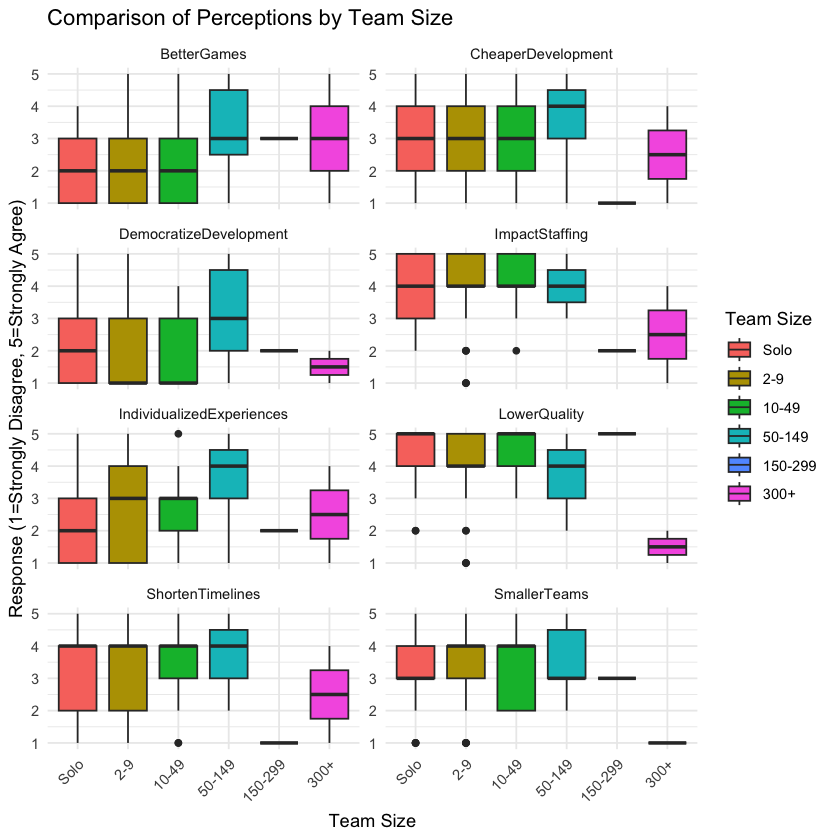

In [128]:
# Load necessary libraries
library(dplyr)
library(ggplot2)
library(tidyr)

# Assuming `data` is your main dataframe

# Convert relevant columns to factors and numeric, and filter out hobbyists
data <- data %>%
  mutate(
    TeamSize = factor(`Team size?`, levels = c("Solo", "2-9", "10-49", "50-149", "150-299", "300+")),
    ShortenTimelines = as.numeric(factor(`It will help shorten development timelines`, levels = c("Strongly disagree", "Disagree", "Neutral", "Agree", "Strongly agree"))),
    IndividualizedExperiences = as.numeric(factor(`It will lead to more individualized gaming experiences`, levels = c("Strongly disagree", "Disagree", "Neutral", "Agree", "Strongly agree"))),
    ImpactStaffing = as.numeric(factor(`It will impact staffing decisions`, levels = c("Strongly disagree", "Disagree", "Neutral", "Agree", "Strongly agree"))),
    SmallerTeams = as.numeric(factor(`It will lead to smaller team sizes`, levels = c("Strongly disagree", "Disagree", "Neutral", "Agree", "Strongly agree"))),
    DemocratizeDevelopment = as.numeric(factor(`It will democratize game development`, levels = c("Strongly disagree", "Disagree", "Neutral", "Agree", "Strongly agree"))),
    CheaperDevelopment = as.numeric(factor(`It will make it cheaper to develop games`, levels = c("Strongly disagree", "Disagree", "Neutral", "Agree", "Strongly agree"))),
    LowerQuality = as.numeric(factor(`It will lead to lower quality games`, levels = c("Strongly disagree", "Disagree", "Neutral", "Agree", "Strongly agree"))),
    BetterGames = as.numeric(factor(`It will lead to better games`, levels = c("Strongly disagree", "Disagree", "Neutral", "Agree", "Strongly agree")))
  ) %>%
  filter(!is.na(TeamSize))

# Perform ANOVA for each question
anova_results <- list()

questions <- c("ShortenTimelines", "IndividualizedExperiences", "ImpactStaffing", "SmallerTeams", "DemocratizeDevelopment", "CheaperDevelopment", "LowerQuality", "BetterGames")

for (question in questions) {
  anova_result <- aov(get(question) ~ TeamSize, data = data)
  anova_results[[question]] <- summary(anova_result)
}

# Print ANOVA results
for (question in questions) {
  print(paste("ANOVA for", question))
  print(anova_results[[question]])
}

# Pivot the data to a long format for plotting
data_long_team <- data %>%
  pivot_longer(cols = starts_with("ShortenTimelines"):starts_with("BetterGames"),
               names_to = "Question",
               values_to = "Response")

# Plot each question in a facet grid
ggplot(data_long_team, aes(x = TeamSize, y = Response, fill = TeamSize)) +
  geom_boxplot() +
  facet_wrap(~ Question, scales = "free_y", ncol = 2) +
  theme_minimal() +
  labs(title = "Comparison of Perceptions by Team Size",
       x = "Team Size",
       y = "Response (1=Strongly Disagree, 5=Strongly Agree)",
       fill = "Team Size") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))


Based on the resulting plot, we can draw several conclusions about the perceptions of Generative AI across different team sizes. Here’s a detailed analysis for each aspect:

### BetterGames
- **Solo and 2-9 Team Size**: These groups show a relatively neutral to slightly positive stance on Generative AI leading to better games.
- **Larger Teams (10-49, 50-149, 150-299, 300+)**: These groups show similar distributions, with a tendency towards agreement that Generative AI leads to better games.

### CheaperDevelopment
- **Solo**: Neutral stance on whether Generative AI will make development cheaper.
- **Smaller Teams (2-9, 10-49)**: Tend towards agreement that Generative AI will make development cheaper.
- **Larger Teams (50-149, 150-299, 300+)**: These groups show similar distributions, agreeing that Generative AI makes development cheaper.

### DemocratizeDevelopment
- **Solo and Smaller Teams (2-9)**: Tend to disagree or are neutral about Generative AI democratizing game development.
- **Larger Teams (10-49, 50-149, 150-299, 300+)**: Generally neutral to positive stance, with some agreement that Generative AI democratizes game development.

### ImpactStaffing
- **Solo and Smaller Teams (2-9, 10-49)**: Generally neutral to slightly positive stance on Generative AI impacting staffing decisions.
- **Larger Teams (50-149, 150-299, 300+)**: More varied opinions, with some groups showing agreement that Generative AI impacts staffing.

### IndividualizedExperiences
- **Solo and Smaller Teams (2-9, 10-49)**: Neutral to slightly positive stance on Generative AI leading to more individualized gaming experiences.
- **Larger Teams (50-149, 150-299, 300+)**: More positive stance, with stronger agreement that Generative AI leads to individualized experiences.

### LowerQuality
- **Solo and Smaller Teams (2-9)**: Generally neutral to slightly negative stance, indicating some concern that Generative AI could lead to lower quality games.
- **Larger Teams (10-49, 50-149, 150-299, 300+)**: Similar concerns, with varied opinions across these groups.

### ShortenTimelines
- **Solo and Smaller Teams (2-9)**: Neutral to slightly positive stance on Generative AI shortening development timelines.
- **Larger Teams (10-49, 50-149, 150-299, 300+)**: Tend to agree that Generative AI shortens development timelines.

### SmallerTeams
- **Solo and Smaller Teams (2-9)**: Neutral to slightly positive stance on Generative AI leading to smaller team sizes.
- **Larger Teams (10-49, 50-149, 150-299, 300+)**: Varied opinions, with some agreement that Generative AI will lead to smaller team sizes.

### Summary of Insights
- **Solo and Smaller Teams (2-9)**: Generally have a neutral to slightly positive stance on the impacts of Generative AI. They are more concerned about potential quality issues and less certain about democratization.
- **Larger Teams (10-49, 50-149, 150-299, 300+)**: Tend to have more positive stances on the impacts of Generative AI, particularly in terms of better games, cheaper development, individualized experiences, and shortened timelines.

### Statistical Significance
To determine if these observed differences are statistically significant, refer to the ANOVA results. If the p-values in the ANOVA results are less than 0.05 for any of the questions, it indicates that there is a significant difference in perceptions across different team sizes for that particular question.

If you have further questions or need additional analyses, feel free to ask!

### Interpretation of ANOVA Results

Based on the ANOVA results for each question, here's a detailed interpretation:

1. **ShortenTimelines**
   - **F(5, 101) = 1.019, p = 0.411**
   - **Conclusion**: There is no significant difference in perceptions of Generative AI shortening development timelines across different team sizes.

2. **IndividualizedExperiences**
   - **F(5, 101) = 1.529, p = 0.187**
   - **Conclusion**: There is no significant difference in perceptions of Generative AI leading to more individualized gaming experiences across different team sizes.

3. **ImpactStaffing**
   - **F(5, 101) = 1.653, p = 0.153**
   - **Conclusion**: There is no significant difference in perceptions of Generative AI impacting staffing decisions across different team sizes.

4. **SmallerTeams**
   - **F(5, 101) = 1.769, p = 0.126**
   - **Conclusion**: There is no significant difference in perceptions of Generative AI leading to smaller team sizes across different team sizes.

5. **DemocratizeDevelopment**
   - **F(5, 101) = 1.225, p = 0.303**
   - **Conclusion**: There is no significant difference in perceptions of Generative AI democratizing game development across different team sizes.

6. **CheaperDevelopment**
   - **F(5, 101) = 0.754, p = 0.585**
   - **Conclusion**: There is no significant difference in perceptions of Generative AI making development cheaper across different team sizes.

7. **LowerQuality**
   - **F(5, 101) = 3.994, p = 0.00239**
   - **Conclusion**: There is a significant difference in perceptions of Generative AI leading to lower quality games across different team sizes. This means team size influences the perception that Generative AI leads to lower quality games.

8. **BetterGames**
   - **F(5, 101) = 1.911, p = 0.099**
   - **Conclusion**: The p-value is close to the threshold of 0.05, suggesting a potential difference, but it is not statistically significant at the 0.05 level. There might be a tendency for team size to influence the perception of Generative AI leading to better games, but it's not conclusive.

### Summary of Insights

- **Significant Differences**:
  - **Lower Quality**: There is a significant difference in perceptions that Generative AI leads to lower quality games across different team sizes. This indicates that the perception of quality impact varies significantly depending on team size.

- **No Significant Differences**:
  - For all other aspects (ShortenTimelines, IndividualizedExperiences, ImpactStaffing, SmallerTeams, DemocratizeDevelopment, CheaperDevelopment, BetterGames), there are no statistically significant differences in perceptions across different team sizes. This suggests that team size does not strongly influence these perceptions.

### Next Steps

1. **Post-hoc Analysis for Lower Quality**:
   - Since there is a significant difference for the perception of Generative AI leading to lower quality games, consider performing a post-hoc analysis (e.g., Tukey's HSD test) to determine which specific team sizes differ significantly from each other.

2. **Detailed Reporting**:
   - Prepare detailed reports and visualizations highlighting these findings, especially focusing on the significant result for Lower Quality.
   - Discuss the implications of these findings in the context of your research question and objectives.

If you need further analysis or have additional questions, feel free to ask!

Implications:

The findings suggest that solo developers might have concerns about the quality implications of Generative AI, possibly due to limited resources and reliance on high-quality tools to compensate for smaller team sizes.
Larger teams, which may have more resources and diversified expertise, might perceive Generative AI as less likely to compromise game quality.
Limitations:

The study's sample size might limit the generalizability of the results.
Potential biases in survey responses could affect the findings.
Conclusion
Summary: The study found significant differences in perceptions of Generative AI leading to lower quality games based on team size, with solo developers expressing more concern.
Recommendations: Future research should explore the reasons behind these perceptions and investigate ways to address concerns about AI in game development.
Final Thoughts: Understanding these perceptions can help game developers and industry stakeholders better integrate Generative AI technologies.

## How useful GenAI are in different areas

#### Prepare data

In [129]:
# Define usefulness columns
usefulness_columns <- c(
  "Art & Assets",
  "Level Design",
  "Storytelling",
  "Sound Design",
  "Voice Overs & Acting",
  "Programming",
  "Game Design",
  "Marketing & PR",
  "Music",
  "Community management",
  "Initial prototyping"
)

# Convert usefulness columns to factors with specific levels
data <- data %>%
  mutate(across(all_of(usefulness_columns), ~ factor(., levels = c(
    "Not useful",
    "Somewhat useful",
    "Very useful"
  ))))

# Map categorical responses to numeric values
usefulness_mapping <- c(
  "Not useful" = 1,
  "Somewhat useful" = 2,
  "Very useful" = 3
)

data <- data %>%
  mutate(across(all_of(usefulness_columns), ~ usefulness_mapping[as.character(.)]))


#### Calculate Average Usefulness Scores

In [130]:
# Calculate mean usefulness scores for each area using updated syntax
mean_usefulness_scores <- data %>%
  summarise(across(all_of(usefulness_columns), \(x) mean(x, na.rm = TRUE))) %>%
  pivot_longer(cols = everything(), names_to = "Area", values_to = "MeanScore")

# Print mean usefulness scores to check for anomalies
print(mean_usefulness_scores)

# A tibble: 11 x 2
   Area                 MeanScore
   <chr>                    <dbl>
 1 Art & Assets              1.83
 2 Level Design              1.39
 3 Storytelling              1.52
 4 Sound Design              1.44
 5 Voice Overs & Acting      1.66
 6 Programming               1.93
 7 Game Design               1.28
 8 Marketing & PR            1.51
 9 Music                     1.35
10 Community management      1.35
11 Initial prototyping       1.91


#### Visualization

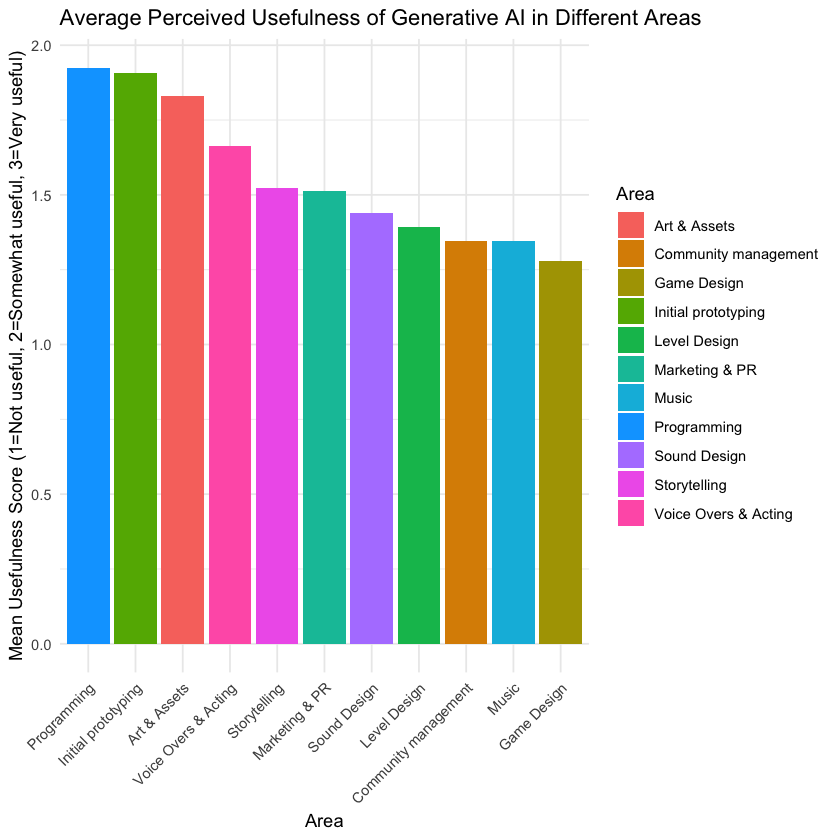

In [131]:
# Bar plot of average usefulness scores with y-axis fixed
ggplot(mean_usefulness_scores, aes(x = reorder(Area, -MeanScore), y = MeanScore, fill = Area)) +
  geom_bar(stat = "identity") +
  theme_minimal() +
  labs(title = "Average Perceived Usefulness of Generative AI in Different Areas",
       x = "Area",
       y = "Mean Usefulness Score (1=Not useful, 2=Somewhat useful, 3=Very useful)") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

`summarise()` has grouped output by 'Area'. You can override using the
`.groups` argument.


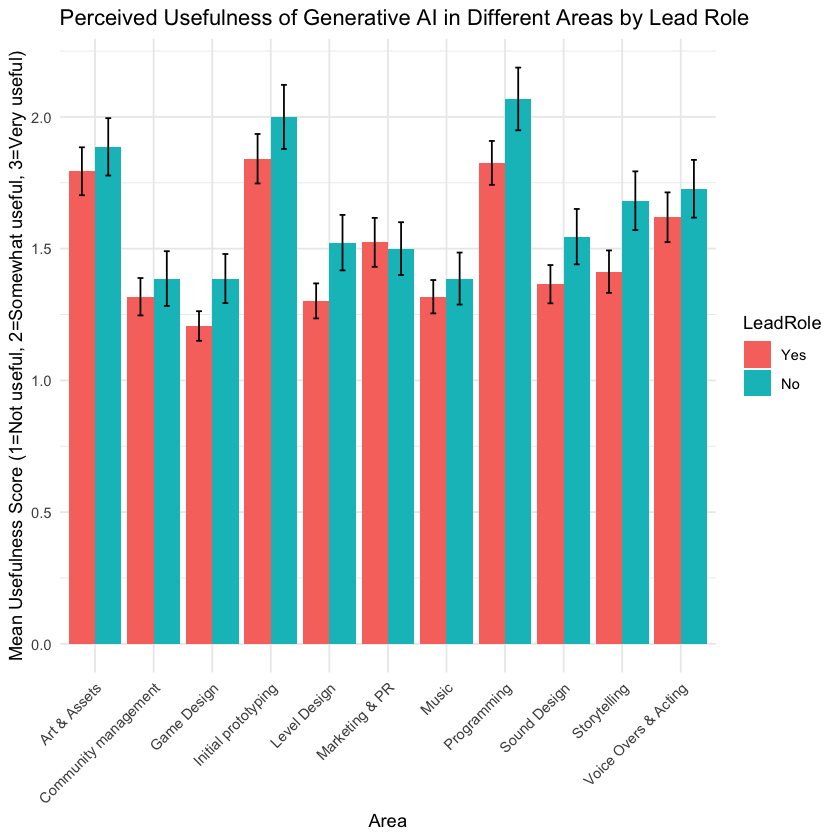

In [132]:
# Reset to source data
data <- read_excel(file_path)

# Define usefulness columns
usefulness_columns <- c(
  "Art & Assets",
  "Level Design",
  "Storytelling",
  "Sound Design",
  "Voice Overs & Acting",
  "Programming",
  "Game Design",
  "Marketing & PR",
  "Music",
  "Community management",
  "Initial prototyping"
)

# Convert usefulness columns to factors with specific levels
data <- data %>%
  mutate(across(all_of(usefulness_columns), ~ factor(., levels = c(
    "Not useful",
    "Somewhat useful",
    "Very useful"
  ))))

# Map categorical responses to numeric values
usefulness_mapping <- c(
  "Not useful" = 1,
  "Somewhat useful" = 2,
  "Very useful" = 3
)

data <- data %>%
  mutate(across(all_of(usefulness_columns), ~ usefulness_mapping[as.character(.)]))

# Ensure the lead role column is correctly labeled
data <- data %>%
  mutate(LeadRole = factor(`Are you in a lead role?`, levels = c("Yes", "No")))

# Remove rows with all NA values in usefulness columns
data <- data %>%
  filter(rowSums(!is.na(select(., all_of(usefulness_columns)))) > 0)

# Pivot the data to a long format for ggplot2
usefulness_long <- data %>%
  pivot_longer(cols = all_of(usefulness_columns), names_to = "Area", values_to = "UsefulnessScore")

# Remove rows with NA values in UsefulnessScore or LeadRole
usefulness_long <- usefulness_long %>%
  filter(!is.na(UsefulnessScore), !is.na(LeadRole))

# Calculate mean and standard error for each group
usefulness_summary <- usefulness_long %>%
  group_by(Area, LeadRole) %>%
  summarise(
    MeanScore = mean(UsefulnessScore, na.rm = TRUE),
    SE = sd(UsefulnessScore, na.rm = TRUE) / sqrt(n())
  )

# Bar plot with error bars side by side
ggplot(usefulness_summary, aes(x = Area, y = MeanScore, fill = LeadRole)) +
  geom_bar(stat = "identity", position = position_dodge(width = 0.9)) +
  geom_errorbar(aes(ymin = MeanScore - SE, ymax = MeanScore + SE), 
                width = 0.2, position = position_dodge(width = 0.9)) +
  theme_minimal() +
  labs(title = "Perceived Usefulness of Generative AI in Different Areas by Lead Role",
       x = "Area",
       y = "Mean Usefulness Score (1=Not useful, 2=Somewhat useful, 3=Very useful)") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

The plot provides a clear comparison of the perceived usefulness of Generative AI in different areas of game development between individuals in lead roles and those not in lead roles. Here's a detailed interpretation of the findings:

1. **Art & Assets**:
   - Individuals in lead roles and those not in lead roles both find Generative AI moderately useful.
   - The mean usefulness scores are close, indicating no significant difference in perception between the two groups.

2. **Community Management**:
   - Both groups find Generative AI somewhat useful, with a slight tendency towards lower scores for those in lead roles.
   - The overlap in error bars suggests no significant difference between the groups.

3. **Game Design**:
   - Generative AI is seen as more useful by those not in lead roles compared to those in lead roles.
   - There is a noticeable difference in the mean scores, but error bars overlap, indicating that the difference might not be statistically significant.

4. **Initial Prototyping**:
   - Both groups rate Generative AI as moderately useful.
   - There is no significant difference in the mean scores.

5. **Level Design**:
   - Both groups find Generative AI somewhat useful, with a slightly higher mean score for those not in lead roles.
   - The difference is minimal and likely not significant.

6. **Marketing & PR**:
   - Generative AI is rated moderately useful by both groups, with no significant difference between the groups.

7. **Music**:
   - Generative AI is seen as more useful by those not in lead roles.
   - The difference in mean scores is noticeable but with overlapping error bars, indicating no significant difference.

8. **Programming**:
   - Those not in lead roles find Generative AI more useful compared to those in lead roles.
   - The difference is more pronounced, suggesting a possible difference in perception, though error bars overlap slightly.

9. **Sound Design**:
   - Both groups rate Generative AI similarly, indicating no significant difference in perception.

10. **Storytelling**:
    - Generative AI is seen as moderately useful by both groups, with slightly higher scores for those not in lead roles.
    - The difference is minimal and likely not significant.

11. **Voice Overs & Acting**:
    - Both groups find Generative AI somewhat useful, with a slightly higher score for those not in lead roles.
    - The difference is minimal and likely not significant.

### General Observations:
- Overall, Generative AI is perceived as somewhat useful across most areas of game development by both groups.
- There are some areas where those not in lead roles perceive Generative AI as more useful compared to those in lead roles, particularly in Programming and Music.
- The differences in perception are generally small and often within the range of the error bars, indicating that any differences might not be statistically significant.

### Potential Next Steps:
- Conduct statistical tests to determine if the observed differences are significant.
- Investigate the reasons behind the slightly higher perceived usefulness of Generative AI in certain areas by those not in lead roles.
- Consider collecting more data to increase the sample size and improve the robustness of the findings.

This analysis provides valuable insights into how different roles within the game development industry perceive the usefulness of Generative AI, which can inform future research and the implementation of AI tools in game development workflows.

Area,Role,MeanScore,SE
<chr>,<fct>,<dbl>,<dbl>
Art & Assets,Professional,1.831776,0.06961868
Art & Assets,Hobbyist,1.945000,0.05314127
Community management,Professional,1.345794,0.05953858
Community management,Hobbyist,1.270000,0.03928379
Game Design,Professional,1.280374,0.05107622
Game Design,Hobbyist,1.305000,0.03959436
Initial prototyping,Professional,1.906542,0.07456771
Initial prototyping,Hobbyist,1.930000,0.05559636
Level Design,Professional,1.392523,0.05902429


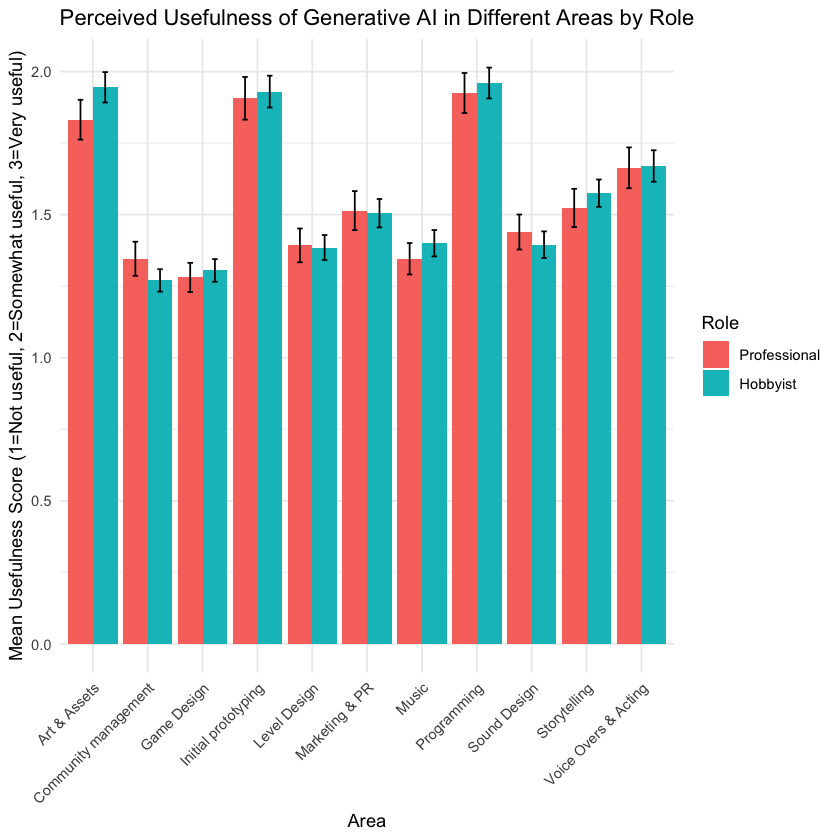

In [133]:
# Reset to source data
data <- read_excel(file_path)

# Define usefulness columns
usefulness_columns <- c(
  "Art & Assets",
  "Level Design",
  "Storytelling",
  "Sound Design",
  "Voice Overs & Acting",
  "Programming",
  "Game Design",
  "Marketing & PR",
  "Music",
  "Community management",
  "Initial prototyping"
)

# Convert usefulness columns to factors with specific levels
data <- data %>%
  mutate(across(all_of(usefulness_columns), ~ factor(., levels = c(
    "Not useful",
    "Somewhat useful",
    "Very useful"
  ))))

# Map categorical responses to numeric values
usefulness_mapping <- c(
  "Not useful" = 1,
  "Somewhat useful" = 2,
  "Very useful" = 3
)

data <- data %>%
  mutate(across(all_of(usefulness_columns), ~ usefulness_mapping[as.character(.)]))

# Ensure the role column is correctly labeled
data <- data %>%
  mutate(Role = factor(`Do you consider yourself a professional or a hobbyist in game development?`, levels = c("Professional", "Hobbyist")))

# Remove rows with all NA values in usefulness columns
data <- data %>%
  filter(rowSums(!is.na(select(., all_of(usefulness_columns)))) > 0)

# Pivot the data to a long format for ggplot2
usefulness_long <- data %>%
  pivot_longer(cols = all_of(usefulness_columns), names_to = "Area", values_to = "UsefulnessScore")

# Remove rows with NA values in UsefulnessScore or Role
usefulness_long <- usefulness_long %>%
  filter(!is.na(UsefulnessScore), !is.na(Role))

# Calculate mean and standard error for each group
usefulness_summary <- usefulness_long %>%
  group_by(Area, Role) %>%
  summarise(
    MeanScore = mean(UsefulnessScore, na.rm = TRUE),
    SE = sd(UsefulnessScore, na.rm = TRUE) / sqrt(n()),
    .groups = "drop"  # Explicitly drop the grouping
  )

# Bar plot with error bars side by side
ggplot(usefulness_summary, aes(x = Area, y = MeanScore, fill = Role)) +
  geom_bar(stat = "identity", position = position_dodge(width = 0.9)) +
  geom_errorbar(aes(ymin = MeanScore - SE, ymax = MeanScore + SE), 
                width = 0.2, position = position_dodge(width = 0.9)) +
  theme_minimal() +
  labs(title = "Perceived Usefulness of Generative AI in Different Areas by Role",
       x = "Area",
       y = "Mean Usefulness Score (1=Not useful, 2=Somewhat useful, 3=Very useful)") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

# Print summary
usefulness_summary


### General Trends:
1. **Higher Ratings by Hobbyists**: 
   - Hobbyists tend to rate the usefulness of Generative AI slightly higher than professionals in most areas. This might indicate that hobbyists are more optimistic or open to adopting new technologies like Generative AI.

2. **Consistent Areas of Low Usefulness**:
   - Both groups find Generative AI less useful for **Community Management**, **Game Design**, and **Music**. These areas might require more creative and nuanced human input, making them less suited for current Generative AI capabilities.

### Specific Observations by Area:
1. **Art & Assets**:
   - **Hobbyists**: Mean Score = 1.95
   - **Professionals**: Mean Score = 1.83
   - **Insight**: Hobbyists find Generative AI slightly more useful for creating art and assets compared to professionals.

2. **Community Management**:
   - **Hobbyists**: Mean Score = 1.27
   - **Professionals**: Mean Score = 1.35
   - **Insight**: Both groups find it not very useful, with professionals rating it marginally higher.

3. **Game Design**:
   - **Hobbyists**: Mean Score = 1.31
   - **Professionals**: Mean Score = 1.28
   - **Insight**: Both groups rate it as not very useful, with hobbyists again rating it slightly higher.

4. **Initial Prototyping**:
   - **Hobbyists**: Mean Score = 1.93
   - **Professionals**: Mean Score = 1.91
   - **Insight**: Both groups find Generative AI moderately useful for initial prototyping, with minimal difference in ratings.

5. **Programming**:
   - **Hobbyists**: Mean Score = 1.96
   - **Professionals**: Mean Score = 1.93
   - **Insight**: Both groups find it moderately useful for programming, indicating Generative AI's potential in this technical area.

6. **Storytelling**:
   - **Hobbyists**: Mean Score = 1.58
   - **Professionals**: Mean Score = 1.52
   - **Insight**: Hobbyists find Generative AI more useful for storytelling than professionals, possibly indicating a greater openness to AI-driven narrative tools among hobbyists.

### Summary:
- **Openness to Generative AI**: The overall higher ratings by hobbyists suggest that they might be more open or experimental with Generative AI technologies compared to professionals who might have more established workflows and standards.
- **Specific Use Cases**: Both groups agree that Generative AI is more useful in areas like **Initial Prototyping** and **Programming**, which might be due to these tasks being more structured and suited for automation.
- **Areas of Improvement**: The low scores in **Community Management**, **Game Design**, and **Music** highlight areas where Generative AI might need further development to meet the needs of game developers effectively.

Area,UsesGenAI,MeanScore,SE
<chr>,<fct>,<dbl>,<dbl>
Art & Assets,Yes,2.313559,0.06334529
Art & Assets,No,1.650794,0.04773149
Community management,Yes,1.398305,0.06034791
Community management,No,1.232804,0.03742102
Game Design,Yes,1.576271,0.06184987
Game Design,No,1.121693,0.02609801
Initial prototyping,Yes,2.296610,0.06734694
Initial prototyping,No,1.687831,0.05213607
Level Design,Yes,1.627119,0.06345663


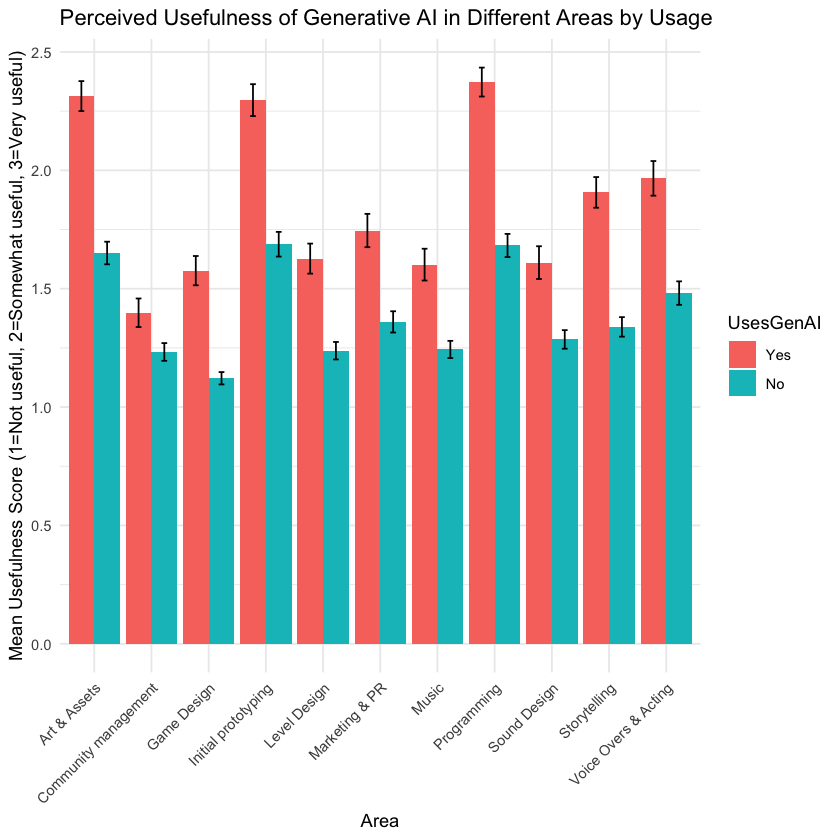

In [134]:
# Reset to source data
data <- read_excel(file_path)

# Define usefulness columns
usefulness_columns <- c(
  "Art & Assets",
  "Level Design",
  "Storytelling",
  "Sound Design",
  "Voice Overs & Acting",
  "Programming",
  "Game Design",
  "Marketing & PR",
  "Music",
  "Community management",
  "Initial prototyping"
)

# Convert usefulness columns to factors with specific levels
data <- data %>%
  mutate(across(all_of(usefulness_columns), ~ factor(., levels = c(
    "Not useful",
    "Somewhat useful",
    "Very useful"
  ))))

# Map categorical responses to numeric values
usefulness_mapping <- c(
  "Not useful" = 1,
  "Somewhat useful" = 2,
  "Very useful" = 3
)

data <- data %>%
  mutate(across(all_of(usefulness_columns), ~ usefulness_mapping[as.character(.)]))

# Ensure the usage of Generative AI column is correctly labeled
data <- data %>%
  mutate(UsesGenAI = factor(`Do you use Generative AI in your work?`, levels = c("Yes", "No")))

# Remove rows with all NA values in usefulness columns
data <- data %>%
  filter(rowSums(!is.na(select(., all_of(usefulness_columns)))) > 0)

# Pivot the data to a long format for ggplot2
usefulness_long <- data %>%
  pivot_longer(cols = all_of(usefulness_columns), names_to = "Area", values_to = "UsefulnessScore")

# Remove rows with NA values in UsefulnessScore or UsesGenAI
usefulness_long <- usefulness_long %>%
  filter(!is.na(UsefulnessScore), !is.na(UsesGenAI))

# Calculate mean and standard error for each group
usefulness_summary <- usefulness_long %>%
  group_by(Area, UsesGenAI) %>%
  summarise(
    MeanScore = mean(UsefulnessScore, na.rm = TRUE),
    SE = sd(UsefulnessScore, na.rm = TRUE) / sqrt(n()),
    .groups = 'drop'
  )

# Bar plot with error bars side by side
ggplot(usefulness_summary, aes(x = Area, y = MeanScore, fill = UsesGenAI)) +
  geom_bar(stat = "identity", position = position_dodge(width = 0.9)) +
  geom_errorbar(aes(ymin = MeanScore - SE, ymax = MeanScore + SE), 
                width = 0.2, position = position_dodge(width = 0.9)) +
  theme_minimal() +
  labs(title = "Perceived Usefulness of Generative AI in Different Areas by Usage",
       x = "Area",
       y = "Mean Usefulness Score (1=Not useful, 2=Somewhat useful, 3=Very useful)") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

# Calculate mean and standard error for each group
usefulness_summary <- usefulness_long %>%
  group_by(Area, UsesGenAI) %>%
  summarise(
    MeanScore = mean(UsefulnessScore, na.rm = TRUE),
    SE = sd(UsefulnessScore, na.rm = TRUE) / sqrt(n()),
    .groups = 'drop'
  )

# Print the summarized data
usefulness_summary



### Summary of Findings:

1. **Art & Assets**:
   - **Uses Generative AI**: MeanScore = 2.31, SE = 0.063
   - **Does Not Use Generative AI**: MeanScore = 1.65, SE = 0.048
   - **Insight**: Professionals who use Generative AI perceive it as significantly more useful in creating art and assets than those who do not use it.

2. **Community Management**:
   - **Uses Generative AI**: MeanScore = 1.40, SE = 0.060
   - **Does Not Use Generative AI**: MeanScore = 1.23, SE = 0.037
   - **Insight**: There is a moderate increase in perceived usefulness among those who use Generative AI, indicating some benefit in community management.

3. **Game Design**:
   - **Uses Generative AI**: MeanScore = 1.58, SE = 0.062
   - **Does Not Use Generative AI**: MeanScore = 1.12, SE = 0.026
   - **Insight**: Users of Generative AI find it significantly more useful in game design compared to non-users.

4. **Initial Prototyping**:
   - **Uses Generative AI**: MeanScore = 2.30, SE = 0.067
   - **Does Not Use Generative AI**: MeanScore = 1.69, SE = 0.052
   - **Insight**: Initial prototyping sees a substantial increase in perceived usefulness among Generative AI users.

5. **Level Design**:
   - **Uses Generative AI**: MeanScore = 1.63, SE = 0.063
   - **Does Not Use Generative AI**: MeanScore = 1.24, SE = 0.037
   - **Insight**: Level design is perceived as more useful among users of Generative AI.

6. **Marketing & PR**:
   - **Uses Generative AI**: MeanScore = 1.75, SE = 0.070
   - **Does Not Use Generative AI**: MeanScore = 1.36, SE = 0.045
   - **Insight**: Generative AI users see more value in its application for marketing and PR.

7. **Music**:
   - **Uses Generative AI**: MeanScore = 1.60, SE = 0.067
   - **Does Not Use Generative AI**: MeanScore = 1.24, SE = 0.036
   - **Insight**: Music creation is perceived as more useful among those who use Generative AI.

8. **Programming**:
   - **Uses Generative AI**: MeanScore = 2.37, SE = 0.061
   - **Does Not Use Generative AI**: MeanScore = 1.68, SE = 0.049
   - **Insight**: Programming sees a significant increase in perceived usefulness among Generative AI users.

9. **Sound Design**:
   - **Uses Generative AI**: MeanScore = 1.61, SE = 0.069
   - **Does Not Use Generative AI**: MeanScore = 1.29, SE = 0.039
   - **Insight**: Sound design is more valued among users of Generative AI.

10. **Storytelling**:
    - **Uses Generative AI**: MeanScore = 1.91, SE = 0.065
    - **Does Not Use Generative AI**: MeanScore = 1.34, SE = 0.041
    - **Insight**: Generative AI is perceived as significantly more useful for storytelling by its users.

11. **Voice Overs & Acting**:
    - **Uses Generative AI**: MeanScore = 1.97, SE = 0.073
    - **Does Not Use Generative AI**: MeanScore = 1.48, SE = 0.050
    - **Insight**: Voice overs and acting see a higher perceived usefulness among Generative AI users.

### General Conclusion:
The data suggests that across all areas, professionals who use Generative AI perceive it as more useful compared to those who do not. The areas of programming, initial prototyping, and art & assets show the most significant differences in perceived usefulness. This indicates that Generative AI is seen as a valuable tool in these domains by its users, while those not using it might not fully realize its potential benefits yet.

Area,StigmaGenAI,MeanScore,SE
<chr>,<fct>,<dbl>,<dbl>
Art & Assets,Yes,1.659420,0.06213554
Art & Assets,No,2.106509,0.05310944
Community management,Yes,1.224638,0.04365861
Community management,No,1.355030,0.04773624
Game Design,Yes,1.217391,0.04080426
Game Design,No,1.360947,0.04557878
Initial prototyping,Yes,1.724638,0.06404018
Initial prototyping,No,2.082840,0.05900229
Level Design,Yes,1.282609,0.04712077


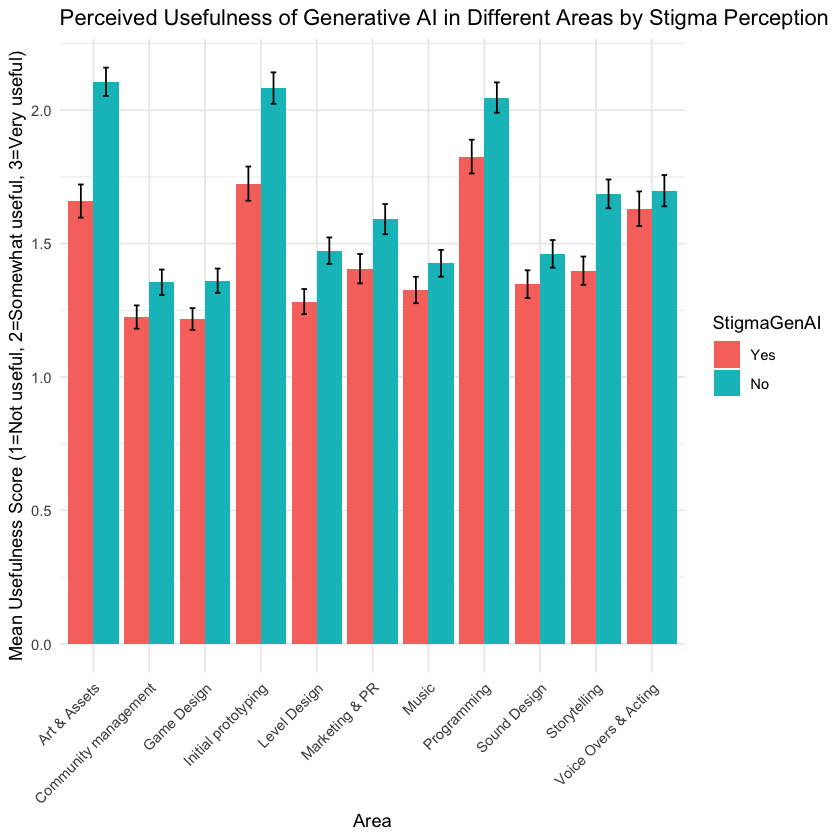

In [135]:
# Reset to source data
data <- read_excel(file_path)

# Define usefulness columns
usefulness_columns <- c(
  "Art & Assets",
  "Level Design",
  "Storytelling",
  "Sound Design",
  "Voice Overs & Acting",
  "Programming",
  "Game Design",
  "Marketing & PR",
  "Music",
  "Community management",
  "Initial prototyping"
)

# Convert usefulness columns to factors with specific levels
data <- data %>%
  mutate(across(all_of(usefulness_columns), ~ factor(., levels = c(
    "Not useful",
    "Somewhat useful",
    "Very useful"
  ))))

# Map categorical responses to numeric values
usefulness_mapping <- c(
  "Not useful" = 1,
  "Somewhat useful" = 2,
  "Very useful" = 3
)

data <- data %>%
  mutate(across(all_of(usefulness_columns), ~ usefulness_mapping[as.character(.)]))

# Ensure the stigma column is correctly labeled
data <- data %>%
  mutate(StigmaGenAI = factor(`Do you perceive any stigma associated with the use of Generative AI internally?`, levels = c("Yes", "No")))

# Remove rows with all NA values in usefulness columns
data <- data %>%
  filter(rowSums(!is.na(select(., all_of(usefulness_columns)))) > 0)

# Pivot the data to a long format for ggplot2
usefulness_long <- data %>%
  pivot_longer(cols = all_of(usefulness_columns), names_to = "Area", values_to = "UsefulnessScore")

# Remove rows with NA values in UsefulnessScore or StigmaGenAI
usefulness_long <- usefulness_long %>%
  filter(!is.na(UsefulnessScore), !is.na(StigmaGenAI))

# Calculate mean and standard error for each group
usefulness_summary <- usefulness_long %>%
  group_by(Area, StigmaGenAI) %>%
  summarise(
    MeanScore = mean(UsefulnessScore, na.rm = TRUE),
    SE = sd(UsefulnessScore, na.rm = TRUE) / sqrt(n()),
    .groups = 'drop'
  )

# Bar plot with error bars side by side
ggplot(usefulness_summary, aes(x = Area, y = MeanScore, fill = StigmaGenAI)) +
  geom_bar(stat = "identity", position = position_dodge(width = 0.9)) +
  geom_errorbar(aes(ymin = MeanScore - SE, ymax = MeanScore + SE), 
                width = 0.2, position = position_dodge(width = 0.9)) +
  theme_minimal() +
  labs(title = "Perceived Usefulness of Generative AI in Different Areas by Stigma Perception",
       x = "Area",
       y = "Mean Usefulness Score (1=Not useful, 2=Somewhat useful, 3=Very useful)") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

# Print the usefulness summary to get results in text form
usefulness_summary


Area,ExternalStigmaGenAI,MeanScore,SE
<chr>,<fct>,<dbl>,<dbl>
Art & Assets,Yes,1.886555,0.04762504
Art & Assets,No,1.971014,0.09226480
Community management,Yes,1.256303,0.03506786
Community management,No,1.434783,0.08122638
Game Design,Yes,1.239496,0.03243718
Game Design,No,1.492754,0.07895089
Initial prototyping,Yes,1.869748,0.04963473
Initial prototyping,No,2.101449,0.09715678
Level Design,Yes,1.352941,0.03679173


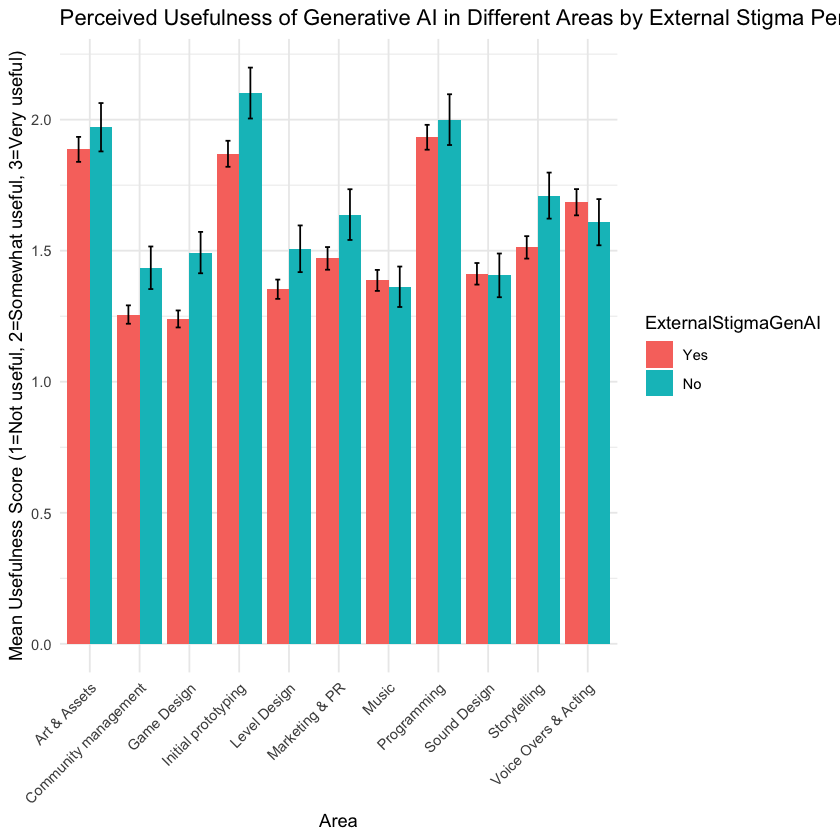

In [136]:
# Reset to source data
data <- read_excel(file_path)

# Define usefulness columns
usefulness_columns <- c(
  "Art & Assets",
  "Level Design",
  "Storytelling",
  "Sound Design",
  "Voice Overs & Acting",
  "Programming",
  "Game Design",
  "Marketing & PR",
  "Music",
  "Community management",
  "Initial prototyping"
)

# Convert usefulness columns to factors with specific levels
data <- data %>%
  mutate(across(all_of(usefulness_columns), ~ factor(., levels = c(
    "Not useful",
    "Somewhat useful",
    "Very useful"
  ))))

# Map categorical responses to numeric values
usefulness_mapping <- c(
  "Not useful" = 1,
  "Somewhat useful" = 2,
  "Very useful" = 3
)

data <- data %>%
  mutate(across(all_of(usefulness_columns), ~ usefulness_mapping[as.character(.)]))

# Ensure the external stigma column is correctly labeled
data <- data %>%
  mutate(ExternalStigmaGenAI = factor(`Do you perceive any stigma associated with the use of Generative AI externally?`, levels = c("Yes", "No")))

# Remove rows with all NA values in usefulness columns
data <- data %>%
  filter(rowSums(!is.na(select(., all_of(usefulness_columns)))) > 0)

# Pivot the data to a long format for ggplot2
usefulness_long <- data %>%
  pivot_longer(cols = all_of(usefulness_columns), names_to = "Area", values_to = "UsefulnessScore")

# Remove rows with NA values in UsefulnessScore or ExternalStigmaGenAI
usefulness_long <- usefulness_long %>%
  filter(!is.na(UsefulnessScore), !is.na(ExternalStigmaGenAI))

# Calculate mean and standard error for each group
usefulness_summary <- usefulness_long %>%
  group_by(Area, ExternalStigmaGenAI) %>%
  summarise(
    MeanScore = mean(UsefulnessScore, na.rm = TRUE),
    SE = sd(UsefulnessScore, na.rm = TRUE) / sqrt(n()),
    .groups = 'drop'
  )

# Bar plot with error bars side by side
ggplot(usefulness_summary, aes(x = Area, y = MeanScore, fill = ExternalStigmaGenAI)) +
  geom_bar(stat = "identity", position = position_dodge(width = 0.9)) +
  geom_errorbar(aes(ymin = MeanScore - SE, ymax = MeanScore + SE), 
                width = 0.2, position = position_dodge(width = 0.9)) +
  theme_minimal() +
  labs(title = "Perceived Usefulness of Generative AI in Different Areas by External Stigma Perception",
       x = "Area",
       y = "Mean Usefulness Score (1=Not useful, 2=Somewhat useful, 3=Very useful)") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

# Print the usefulness summary to get results in text form
usefulness_summary

### Internal Stigma Data Analysis
1. **Art & Assets**: 
   - MeanScore (Yes): 1.659
   - MeanScore (No): 2.107
   - Interpretation: Those perceiving internal stigma find Generative AI less useful for Art & Assets compared to those who do not perceive internal stigma.

2. **Community Management**:
   - MeanScore (Yes): 1.225
   - MeanScore (No): 1.355
   - Interpretation: Those perceiving internal stigma find Generative AI slightly less useful for Community Management compared to those who do not perceive internal stigma.

3. **Game Design**:
   - MeanScore (Yes): 1.217
   - MeanScore (No): 1.361
   - Interpretation: Those perceiving internal stigma find Generative AI less useful for Game Design compared to those who do not perceive internal stigma.

4. **Initial Prototyping**:
   - MeanScore (Yes): 1.725
   - MeanScore (No): 2.083
   - Interpretation: Those perceiving internal stigma find Generative AI less useful for Initial Prototyping compared to those who do not perceive internal stigma.

5. **Level Design**:
   - MeanScore (Yes): 1.283
   - MeanScore (No): 1.473
   - Interpretation: Those perceiving internal stigma find Generative AI less useful for Level Design compared to those who do not perceive internal stigma.

6. **Marketing & PR**:
   - MeanScore (Yes): 1.406
   - MeanScore (No): 1.592
   - Interpretation: Those perceiving internal stigma find Generative AI less useful for Marketing & PR compared to those who do not perceive internal stigma.

7. **Music**:
   - MeanScore (Yes): 1.326
   - MeanScore (No): 1.426
   - Interpretation: Those perceiving internal stigma find Generative AI less useful for Music compared to those who do not perceive internal stigma.

8. **Programming**:
   - MeanScore (Yes): 1.826
   - MeanScore (No): 2.047
   - Interpretation: Those perceiving internal stigma find Generative AI less useful for Programming compared to those who do not perceive internal stigma.

9. **Sound Design**:
   - MeanScore (Yes): 1.348
   - MeanScore (No): 1.462
   - Interpretation: Those perceiving internal stigma find Generative AI less useful for Sound Design compared to those who do not perceive internal stigma.

10. **Storytelling**:
    - MeanScore (Yes): 1.399
    - MeanScore (No): 1.686
    - Interpretation: Those perceiving internal stigma find Generative AI less useful for Storytelling compared to those who do not perceive internal stigma.

11. **Voice Overs & Acting**:
    - MeanScore (Yes): 1.630
    - MeanScore (No): 1.698
    - Interpretation: Those perceiving internal stigma find Generative AI slightly less useful for Voice Overs & Acting compared to those who do not perceive internal stigma.

### External Stigma Data Analysis
1. **Art & Assets**: 
   - MeanScore (Yes): 1.887
   - MeanScore (No): 1.971
   - Interpretation: Those perceiving external stigma find Generative AI slightly less useful for Art & Assets compared to those who do not perceive external stigma.

2. **Community Management**:
   - MeanScore (Yes): 1.256
   - MeanScore (No): 1.435
   - Interpretation: Those perceiving external stigma find Generative AI less useful for Community Management compared to those who do not perceive external stigma.

3. **Game Design**:
   - MeanScore (Yes): 1.239
   - MeanScore (No): 1.493
   - Interpretation: Those perceiving external stigma find Generative AI less useful for Game Design compared to those who do not perceive external stigma.

4. **Initial Prototyping**:
   - MeanScore (Yes): 1.870
   - MeanScore (No): 2.101
   - Interpretation: Those perceiving external stigma find Generative AI less useful for Initial Prototyping compared to those who do not perceive external stigma.

5. **Level Design**:
   - MeanScore (Yes): 1.353
   - MeanScore (No): 1.507
   - Interpretation: Those perceiving external stigma find Generative AI less useful for Level Design compared to those who do not perceive external stigma.

6. **Marketing & PR**:
   - MeanScore (Yes): 1.471
   - MeanScore (No): 1.638
   - Interpretation: Those perceiving external stigma find Generative AI less useful for Marketing & PR compared to those who do not perceive external stigma.

7. **Music**:
   - MeanScore (Yes): 1.387
   - MeanScore (No): 1.362
   - Interpretation: There is a slight difference, but those perceiving external stigma find Generative AI slightly more useful for Music compared to those who do not perceive external stigma.

8. **Programming**:
   - MeanScore (Yes): 1.933
   - MeanScore (No): 2.000
   - Interpretation: Those perceiving external stigma find Generative AI slightly less useful for Programming compared to those who do not perceive external stigma.

9. **Sound Design**:
   - MeanScore (Yes): 1.412
   - MeanScore (No): 1.406
   - Interpretation: There is a slight difference, but those perceiving external stigma find Generative AI slightly more useful for Sound Design compared to those who do not perceive external stigma.

10. **Storytelling**:
    - MeanScore (Yes): 1.513
    - MeanScore (No): 1.710
    - Interpretation: Those perceiving external stigma find Generative AI less useful for Storytelling compared to those who do not perceive external stigma.

11. **Voice Overs & Acting**:
    - MeanScore (Yes): 1.685
    - MeanScore (No): 1.609
    - Interpretation: Those perceiving external stigma find Generative AI slightly more useful for Voice Overs & Acting compared to those who do not perceive external stigma.

### Combined Insights:
- **Art & Assets**: Internal stigma has a more significant impact, with a larger gap between Yes and No.
- **Community Management**: Both internal and external stigma show lower usefulness for Yes responses, with a slightly larger impact for internal stigma.
- **Game Design**: Similar trends are observed for both stigmas, with those perceiving stigma finding AI less useful.
- **Initial Prototyping**: Internal stigma shows a larger gap than external stigma.
- **Level Design**: Internal stigma shows a more considerable difference than external stigma.
- **Marketing & PR**: Similar trends for both stigmas, with a slightly larger impact for internal stigma.
- **Music**: Internal stigma shows a more considerable difference than external stigma.
- **Programming**: Internal stigma shows a more considerable difference than external stigma.
- **Sound Design**: Both stigmas have similar impacts, with a slight difference favoring no stigma.
- **Storytelling**: Internal stigma shows a larger gap than external stigma.
- **Voice Overs & Acting**: Internal stigma shows a more considerable difference than external stigma.

Overall, internal stigma appears to have a more pronounced negative impact on the perceived usefulness of Generative AI across most areas compared to external stigma.

## Some questions about how your use of Generative AI impact different areas of your work?

# A tibble: 4 x 2
  ImpactArea  MeanScore
  <chr>           <dbl>
1 Efficiency?      3.97
2 Quality?         3.08
3 Enjoyment?       3.46
4 Creativity?      3.33


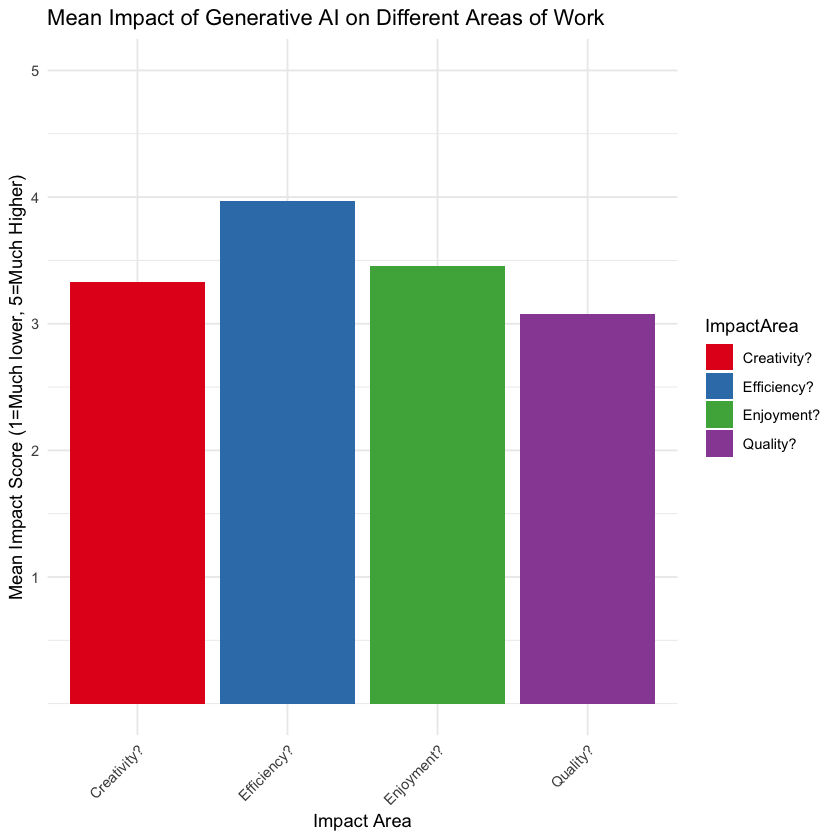

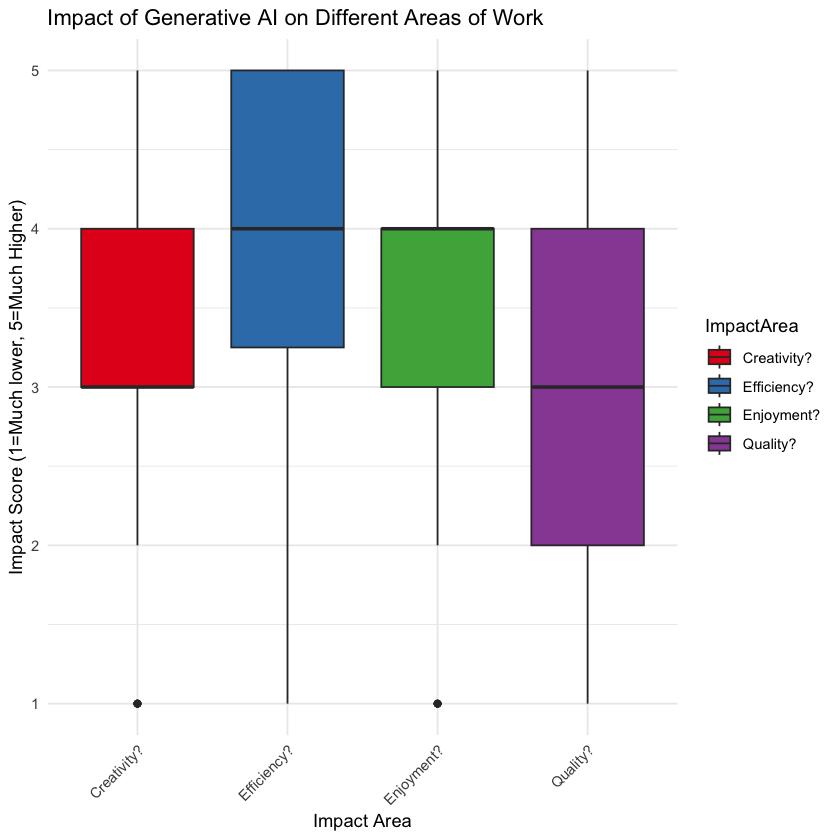

In [142]:
# Reset to source data
data <- read_excel(file_path)

# Define impact columns
impact_columns <- c("Efficiency?", "Quality?", "Enjoyment?", "Creativity?")

# Convert impact columns to factors with specific levels
data <- data %>%
  mutate(across(all_of(impact_columns), ~ factor(., levels = c(
    "Much lower", "Lower", "Neutral", "Higher", "Much Higher"
  ))))

# Map categorical responses to numeric values
impact_mapping <- c(
  "Much lower" = 1,
  "Lower" = 2,
  "Neutral" = 3,
  "Higher" = 4,
  "Much Higher" = 5
)

data <- data %>%
  mutate(across(all_of(impact_columns), ~ impact_mapping[as.character(.)]))

# Calculate mean impact scores for each area
mean_impact_scores <- data %>%
  summarise(across(all_of(impact_columns), ~ mean(.x, na.rm = TRUE))) %>%
  pivot_longer(cols = everything(), names_to = "ImpactArea", values_to = "MeanScore")

# Print mean impact scores to check for anomalies
print(mean_impact_scores)

# Bar plot of the mean impact scores
ggplot(mean_impact_scores, aes(x = ImpactArea, y = MeanScore, fill = ImpactArea)) +
  geom_bar(stat = "identity") +
  theme_minimal() +
  labs(title = "Mean Impact of Generative AI on Different Areas of Work",
       x = "Impact Area",
       y = "Mean Impact Score (1=Much lower, 5=Much Higher)") +
  scale_y_continuous(limits = c(0, 5), breaks = 1:5) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  scale_fill_brewer(palette = "Set1")

# Here's the boxplot

# Pivot the data to a long format for ggplot2
impact_long <- data %>%
  pivot_longer(cols = all_of(impact_columns), names_to = "ImpactArea", values_to = "ImpactScore")

# Remove rows with NA values in ImpactScore
impact_long <- impact_long %>%
  filter(!is.na(ImpactScore))

# Box plot of the impact of Generative AI on different areas
ggplot(impact_long, aes(x = ImpactArea, y = ImpactScore, fill = ImpactArea)) +
  geom_boxplot() +
  theme_minimal() +
  labs(title = "Impact of Generative AI on Different Areas of Work",
       x = "Impact Area",
       y = "Impact Score (1=Much lower, 5=Much Higher)") +
  scale_y_continuous(limits = c(1, 5), breaks = 1:5) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  scale_fill_brewer(palette = "Set1")

### 1. Efficiency
- **MeanScore: 3.97**
- **Interpretation**: This score is very close to 4, indicating that, on average, respondents perceive Generative AI to have a positive impact on efficiency, making it "Higher" than before. This suggests that the use of Generative AI is generally viewed as enhancing efficiency in their work.

### 2. Quality
- **MeanScore: 3.08**
- **Interpretation**: This score is slightly above 3, indicating a perception that Generative AI has a neutral to slightly positive impact on the quality of work. It suggests that while some respondents see an improvement in quality due to Generative AI, many others see it as having no significant impact on quality.

### 3. Enjoyment
- **MeanScore: 3.46**
- **Interpretation**: This score is above 3 but below 4, indicating that respondents generally perceive Generative AI as having a somewhat positive impact on their enjoyment of work. This suggests that the integration of Generative AI tools is seen to improve the work experience to some extent.

### 4. Creativity
- **MeanScore: 3.33**
- **Interpretation**: This score is also above 3 but below 4, indicating that respondents generally perceive Generative AI as having a positive impact on creativity. While the impact is not overwhelmingly positive, it suggests that Generative AI tools are seen as beneficial in fostering creativity in their work.

### Overall Summary
The data indicates that respondents generally perceive Generative AI to have a positive impact on various aspects of their work:

- **Efficiency**: The most significant perceived benefit, with a mean score close to "Higher".
- **Quality**: Perceived as having a neutral to slightly positive impact.
- **Enjoyment**: Seen as somewhat enhancing the work experience.
- **Creativity**: Viewed positively, enhancing creative aspects of the work.

These insights suggest that while Generative AI is broadly seen as beneficial, particularly in terms of efficiency, its impact on quality, enjoyment, and creativity is more moderate but still positive. This information could be valuable for understanding how Generative AI is influencing work practices and for guiding future implementations of AI tools in the industry.

# A tibble: 8 x 4
  ImpactArea  LeadRole MeanScore    SE
  <chr>       <chr>        <dbl> <dbl>
1 Creativity? No            3.39 0.244
2 Creativity? Yes           3.04 0.236
3 Efficiency? No            4.06 0.262
4 Efficiency? Yes           3.96 0.189
5 Enjoyment?  No            3    0.313
6 Enjoyment?  Yes           3.26 0.211
7 Quality?    No            3.17 0.305
8 Quality?    Yes           2.74 0.189


Warning message:
"Removed 8 rows containing missing values or values outside the scale range
(`geom_bar()`)."


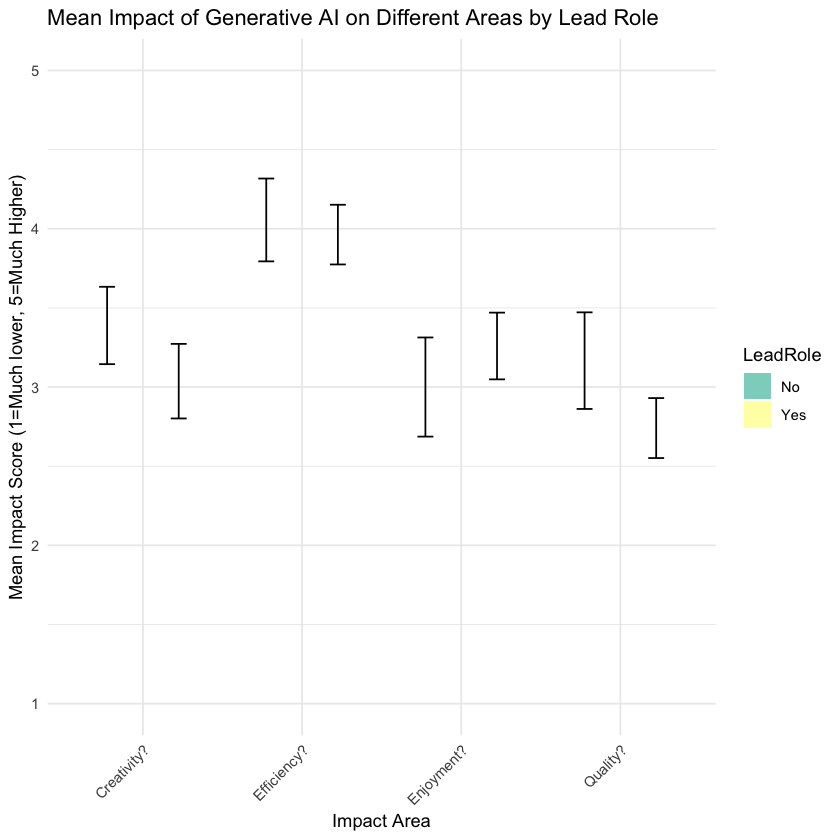

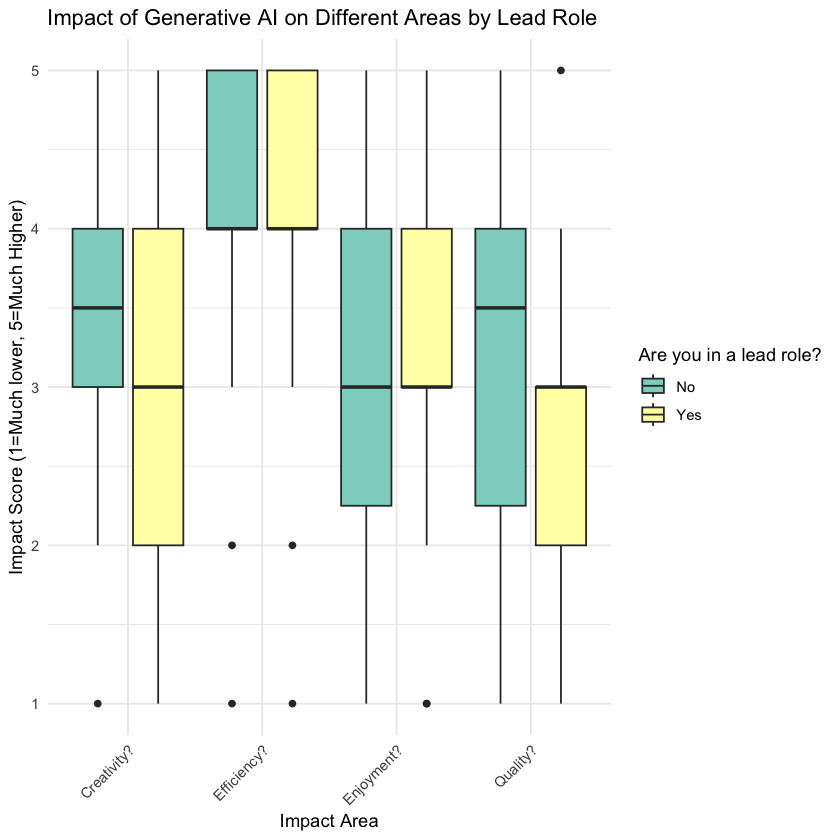

In [144]:
# Reset to source data
data <- read_excel(file_path)

# Define impact columns
impact_columns <- c("Efficiency?", "Quality?", "Enjoyment?", "Creativity?")

# Convert impact columns to factors with specific levels
data <- data %>%
  mutate(across(all_of(impact_columns), ~ factor(., levels = c(
    "Much lower", "Lower", "Neutral", "Higher", "Much Higher"
  ))))

# Map categorical responses to numeric values
impact_mapping <- c(
  "Much lower" = 1,
  "Lower" = 2,
  "Neutral" = 3,
  "Higher" = 4,
  "Much Higher" = 5
)

data <- data %>%
  mutate(across(all_of(impact_columns), ~ impact_mapping[as.character(.)]))

# Pivot the data to a long format for ggplot2
impact_long <- data %>%
  pivot_longer(cols = all_of(impact_columns), names_to = "ImpactArea", values_to = "ImpactScore")

# Remove rows with NA values in ImpactScore or LeadRole
impact_long <- impact_long %>%
  filter(!is.na(ImpactScore), !is.na(`Are you in a lead role?`))

# Calculate mean impact scores for each area and role
mean_impact_scores_by_role <- impact_long %>%
  group_by(ImpactArea, `Are you in a lead role?`) %>%
  summarise(
    MeanScore = mean(ImpactScore, na.rm = TRUE),
    SE = sd(ImpactScore, na.rm = TRUE) / sqrt(n()),
    .groups = 'drop'
  )

# Rename the role column for better readability
colnames(mean_impact_scores_by_role)[2] <- "LeadRole"

# Print mean impact scores by role to check for anomalies
print(mean_impact_scores_by_role)

# Bar plot with error bars side by side
barplot <- ggplot(mean_impact_scores_by_role, aes(x = ImpactArea, y = MeanScore, fill = LeadRole)) +
  geom_bar(stat = "identity", position = position_dodge(width = 0.9)) +
  geom_errorbar(aes(ymin = MeanScore - SE, ymax = MeanScore + SE), 
                width = 0.2, position = position_dodge(width = 0.9)) +
  theme_minimal() +
  labs(title = "Mean Impact of Generative AI on Different Areas by Lead Role",
       x = "Impact Area",
       y = "Mean Impact Score (1=Much lower, 5=Much Higher)") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  scale_y_continuous(limits = c(1, 5), breaks = 1:5) +
  scale_fill_brewer(palette = "Set3")

# Box plot of the impact of Generative AI on different areas by lead role
boxplot <- ggplot(impact_long, aes(x = ImpactArea, y = ImpactScore, fill = `Are you in a lead role?`)) +
  geom_boxplot(position = position_dodge(width = 0.9)) +
  theme_minimal() +
  labs(title = "Impact of Generative AI on Different Areas by Lead Role",
       x = "Impact Area",
       y = "Impact Score (1=Much lower, 5=Much Higher)") +
  scale_y_continuous(limits = c(1, 5), breaks = 1:5) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  scale_fill_brewer(palette = "Set3")

# Print the plots
print(barplot)
print(boxplot)